In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),  # Sigmoid activation to scale values between 0 and 1 (like MNIST)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
# Hyperparameters
batch_size = 256
learning_rate = 0.001
num_epochs = 20

# Load the MNIST dataset and split into training and testing sets
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Split the dataset into 1000 training and 200 testing
# Define the sizes for train, validation, and test sets
train_size = 1000
val_size = len(mnist_dataset) - train_size - 200  # The rest goes to the validation set
test_size = 200

# Use random_split to create the datasets
train_dataset, val_dataset, test_dataset = random_split(mnist_dataset, [train_size, val_size, test_size])

# Create data loaders for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the autoencoder
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

Epoch [1/20], Train Loss: 0.2262
Epoch [1/20], Test Loss: 0.2131
Epoch [2/20], Train Loss: 0.1983
Epoch [2/20], Test Loss: 0.1715
Epoch [3/20], Train Loss: 0.1517
Epoch [3/20], Test Loss: 0.1224
Epoch [4/20], Train Loss: 0.1087
Epoch [4/20], Test Loss: 0.0900
Epoch [5/20], Train Loss: 0.0854
Epoch [5/20], Test Loss: 0.0762
Epoch [6/20], Train Loss: 0.0766
Epoch [6/20], Test Loss: 0.0714
Epoch [7/20], Train Loss: 0.0733
Epoch [7/20], Test Loss: 0.0695
Epoch [8/20], Train Loss: 0.0714
Epoch [8/20], Test Loss: 0.0681
Epoch [9/20], Train Loss: 0.0700
Epoch [9/20], Test Loss: 0.0666
Epoch [10/20], Train Loss: 0.0685
Epoch [10/20], Test Loss: 0.0653
Epoch [11/20], Train Loss: 0.0671
Epoch [11/20], Test Loss: 0.0638
Epoch [12/20], Train Loss: 0.0654
Epoch [12/20], Test Loss: 0.0624
Epoch [13/20], Train Loss: 0.0638
Epoch [13/20], Test Loss: 0.0608
Epoch [14/20], Train Loss: 0.0621
Epoch [14/20], Test Loss: 0.0592
Epoch [15/20], Train Loss: 0.0604
Epoch [15/20], Test Loss: 0.0576
Epoch [16/20]

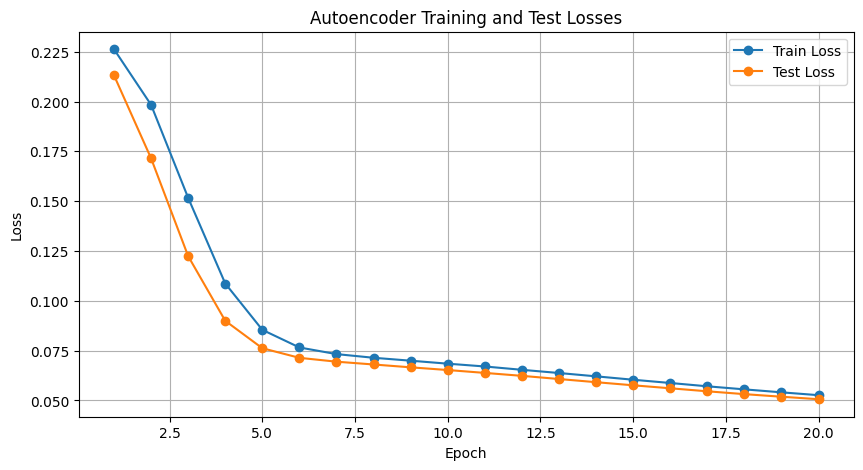

In [4]:
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    train_loss = 0.0
    for data in train_dataloader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = autoencoder(inputs)

        # Calculate the loss
        loss = criterion(outputs, inputs)
        train_loss += loss.item()

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch
    train_loss /= len(train_dataloader)
    train_losses.append(train_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')

    # Evaluation on the test set
    test_loss = 0.0
    with torch.no_grad():
        for data in test_dataloader:
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)
        
            # Forward pass through the autoencoder
            outputs = autoencoder(inputs)
        
            # Calculate the test loss
            loss = criterion(outputs, inputs)
            test_loss += loss.item()

    # Calculate average test loss for the epoch
    test_loss /= len(test_dataloader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Autoencoder Training and Test Losses')
plt.show()

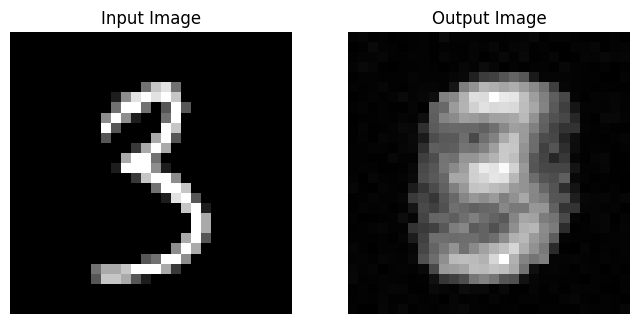

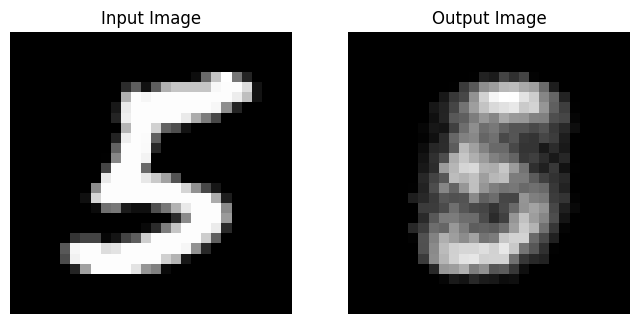

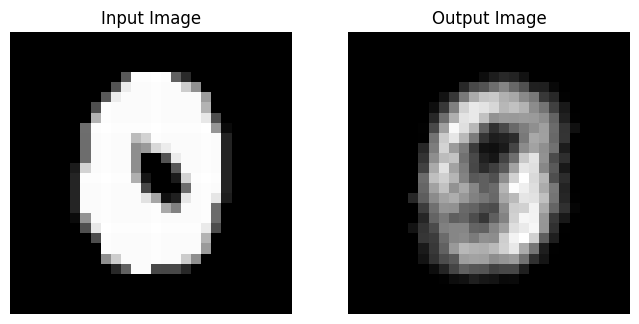

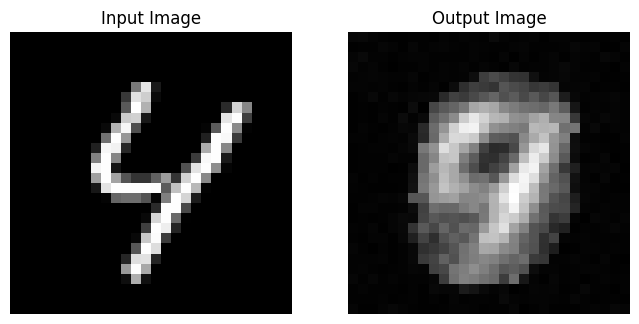

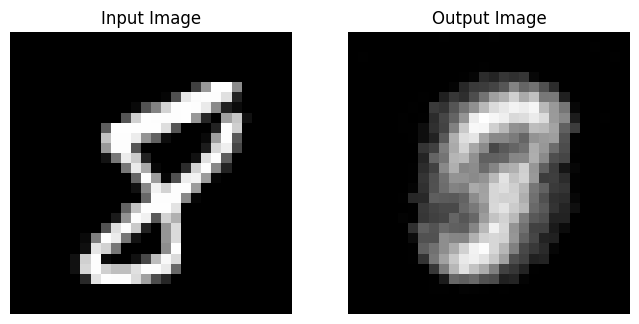

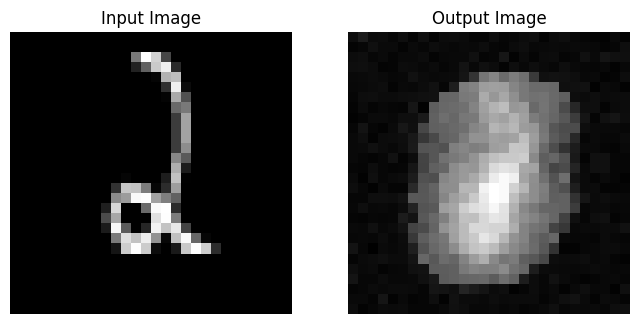

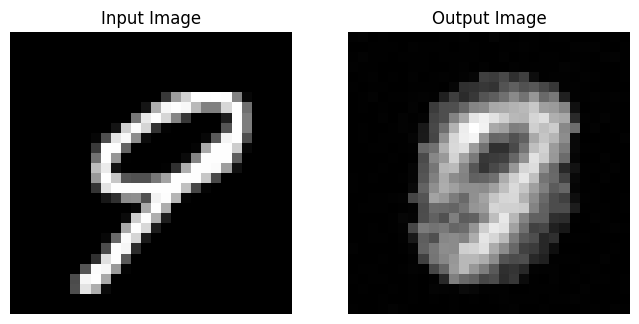

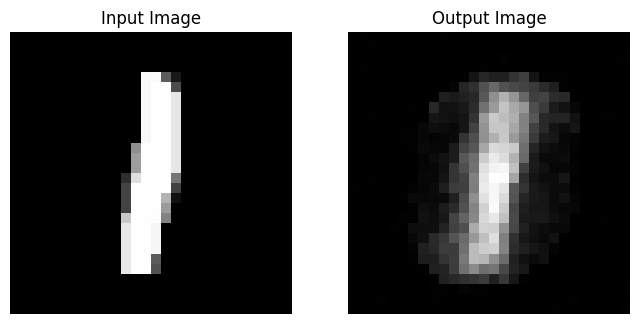

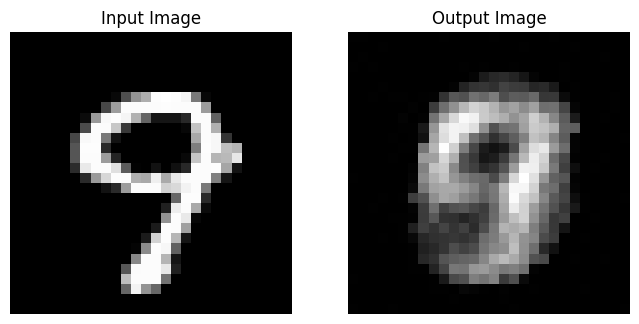

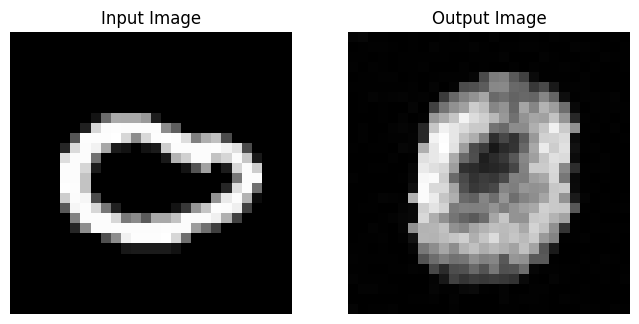

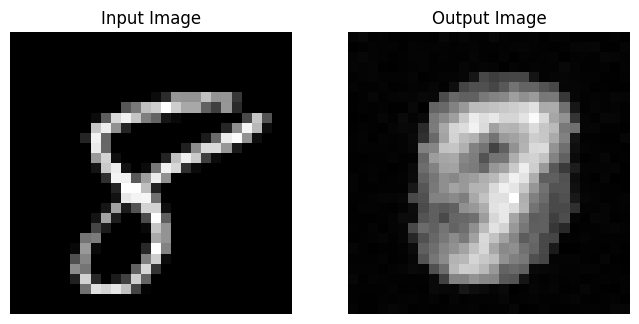

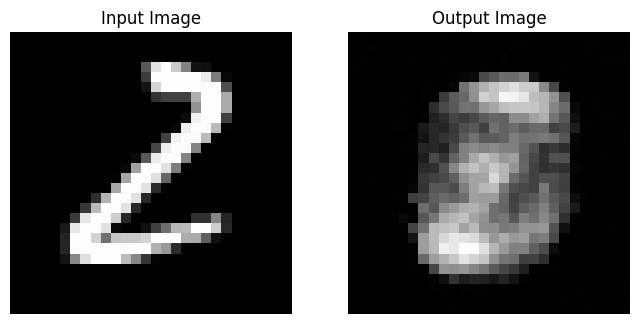

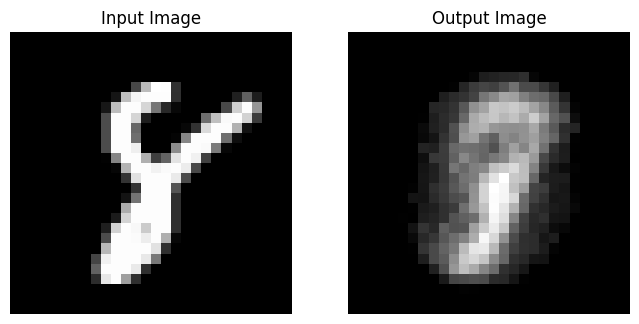

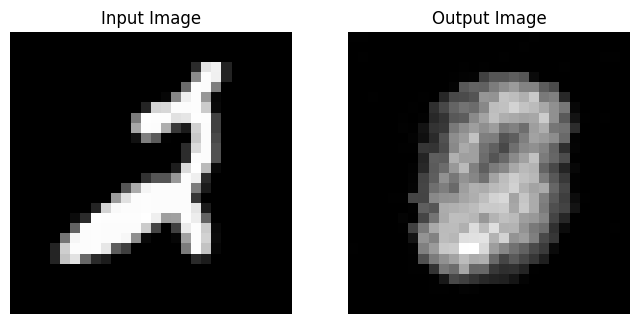

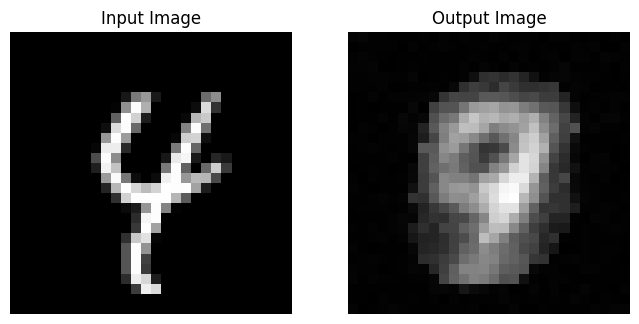

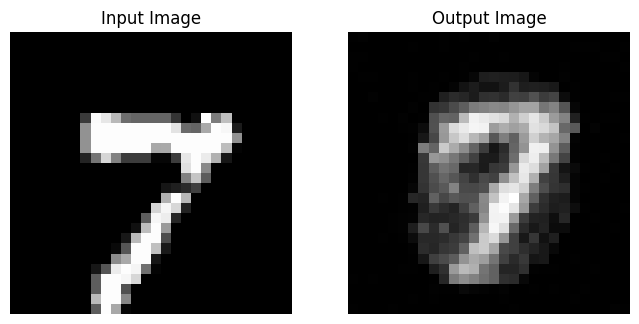

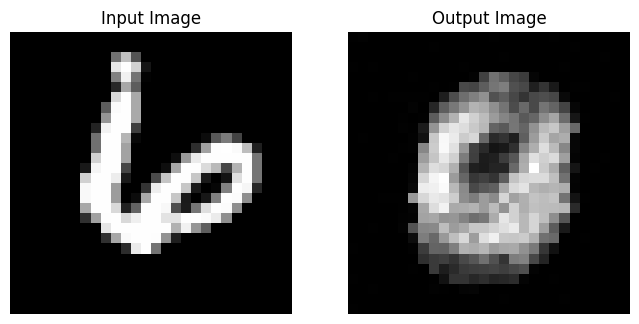

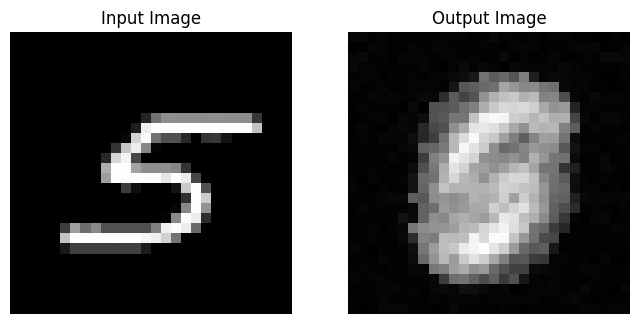

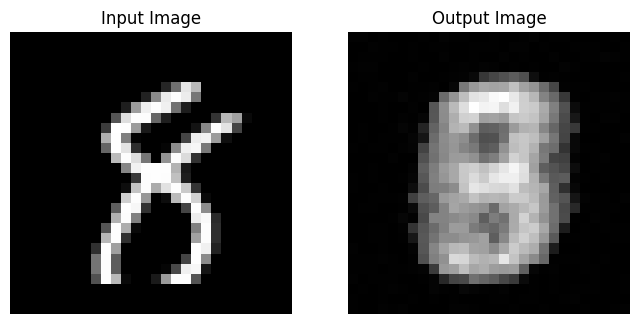

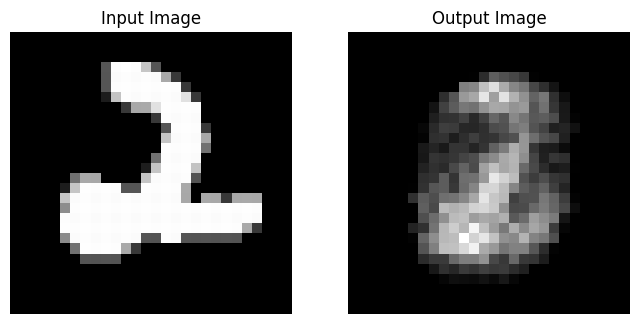

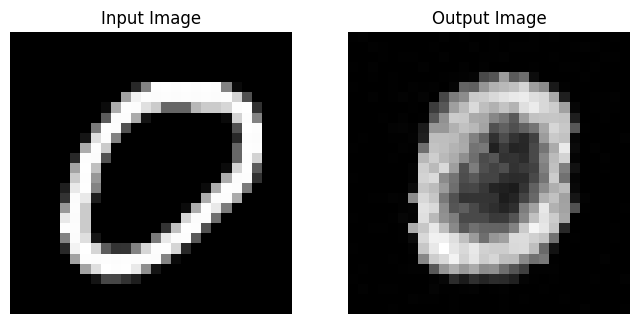

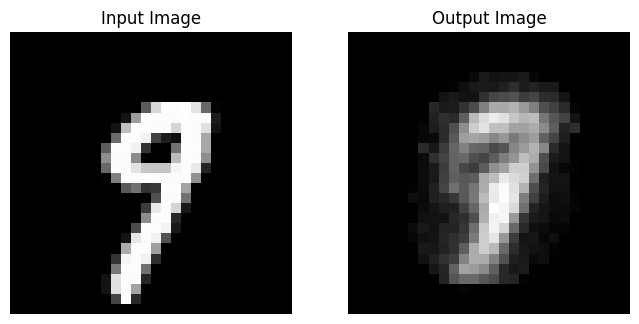

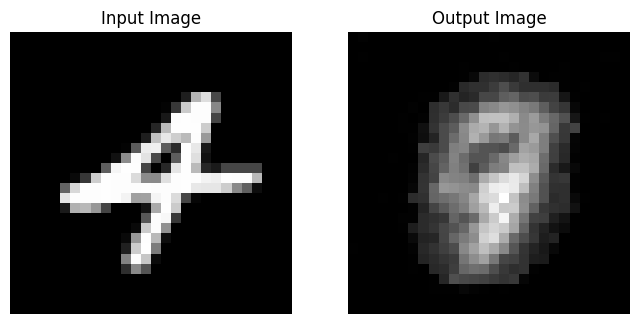

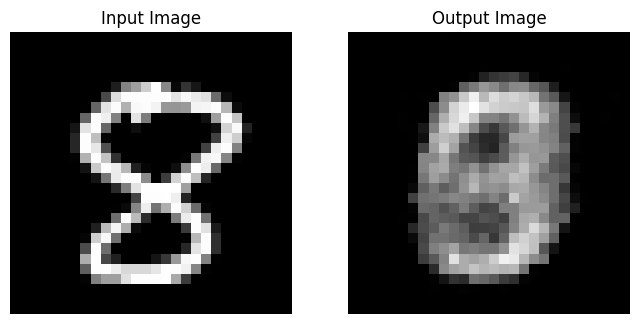

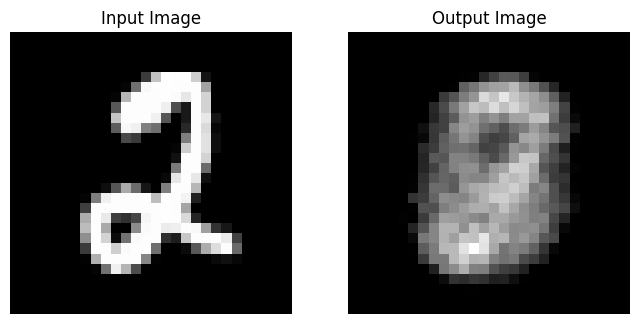

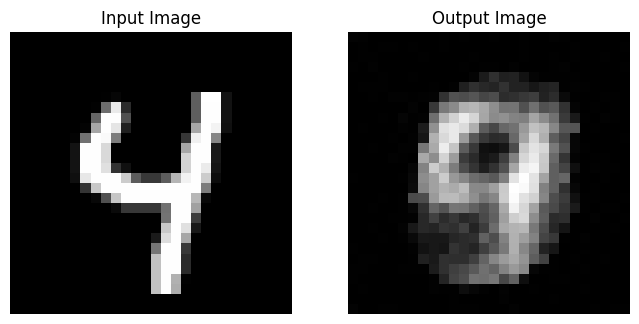

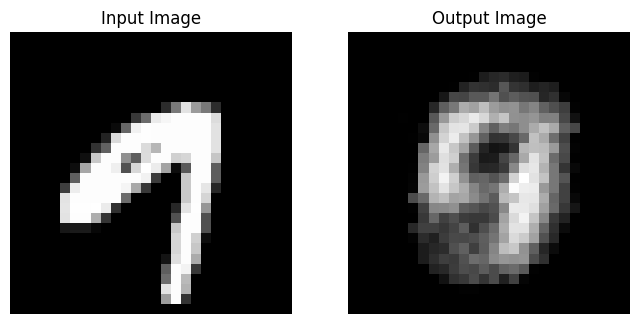

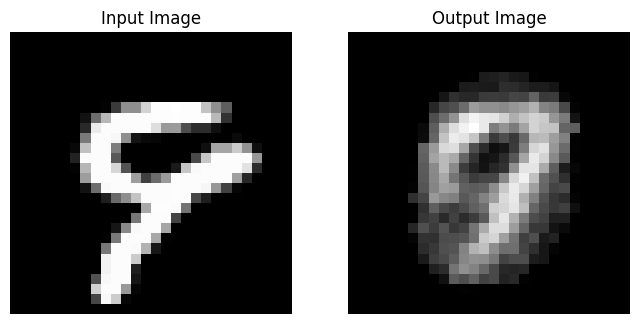

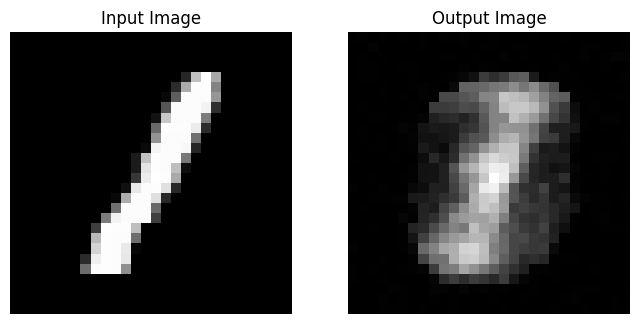

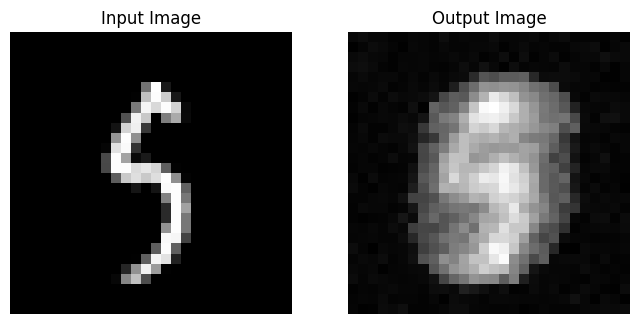

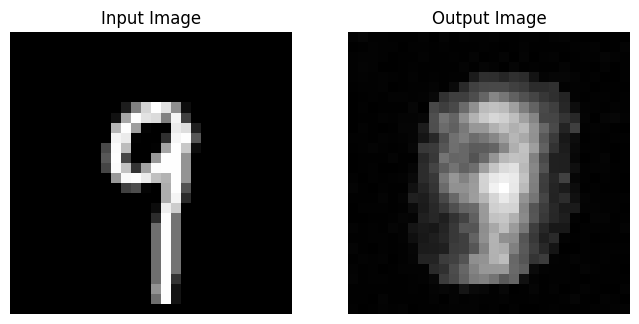

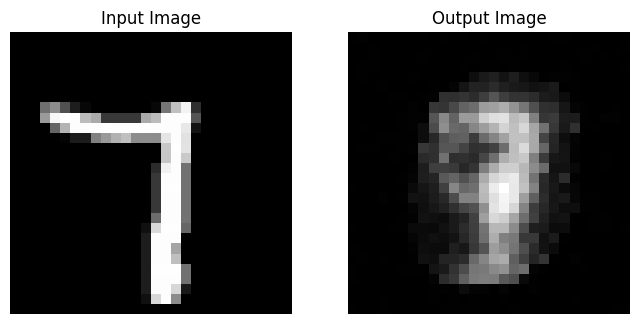

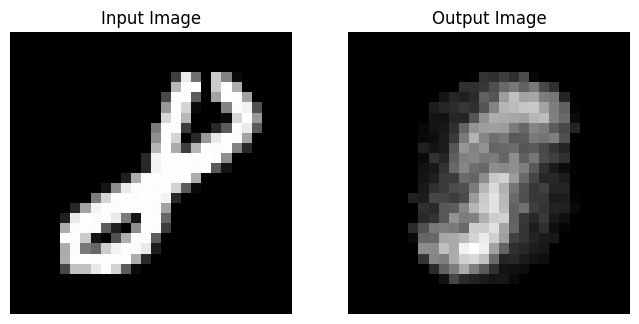

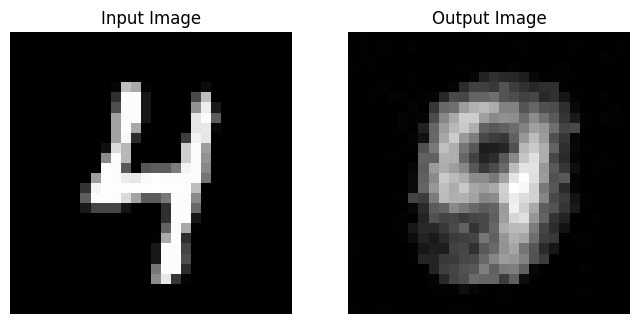

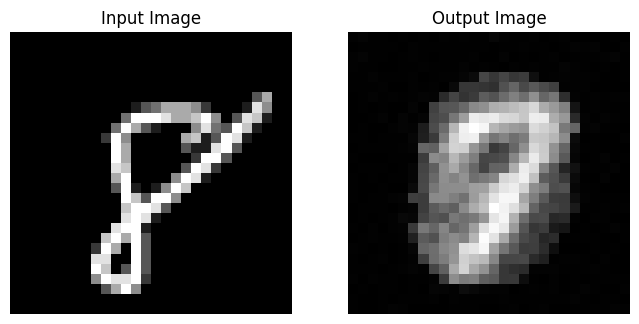

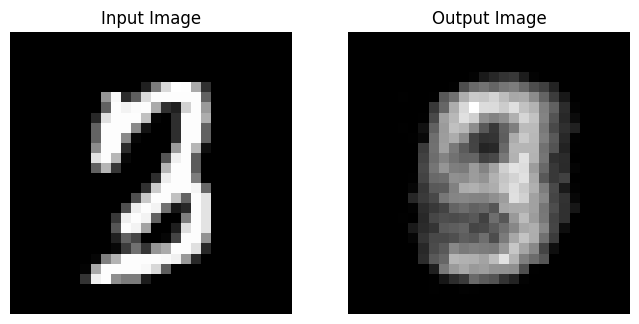

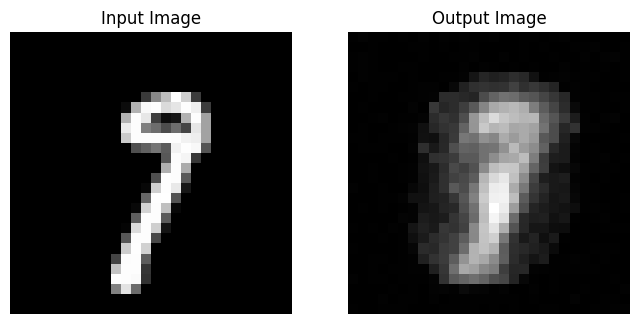

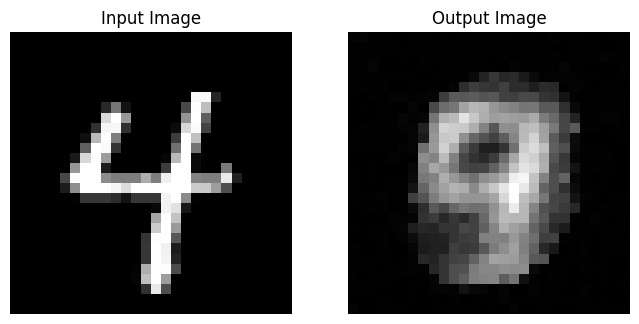

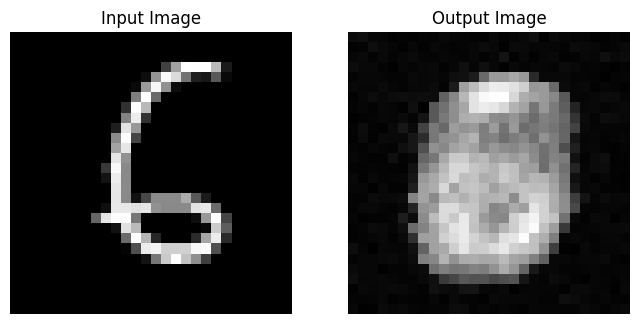

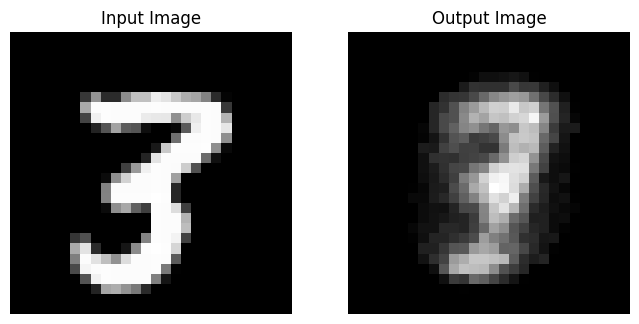

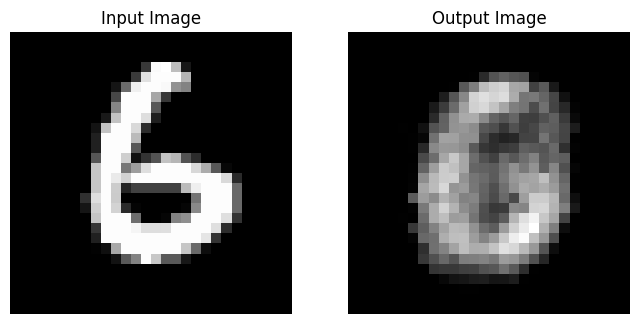

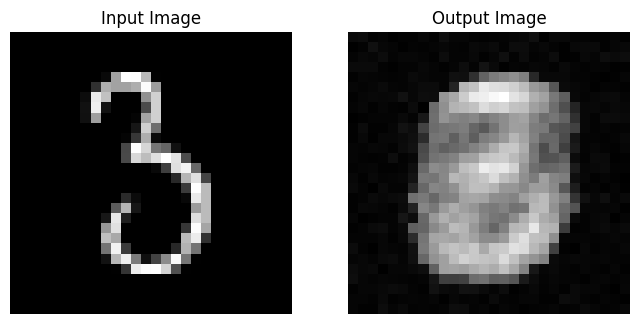

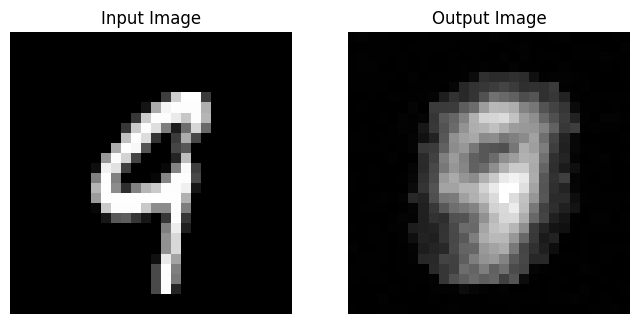

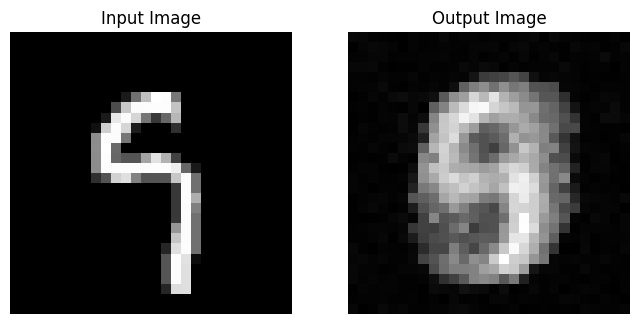

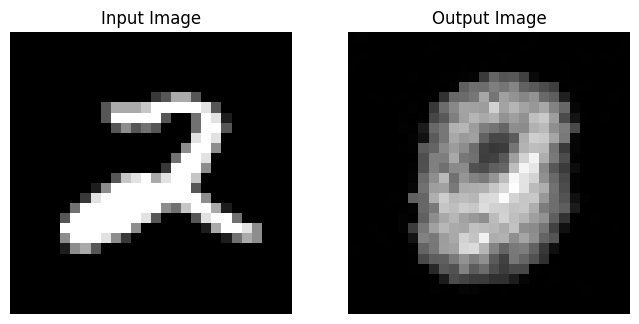

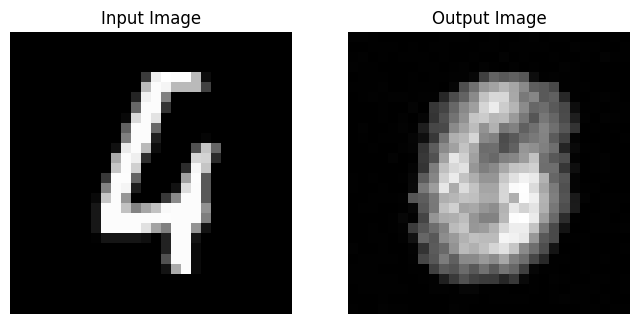

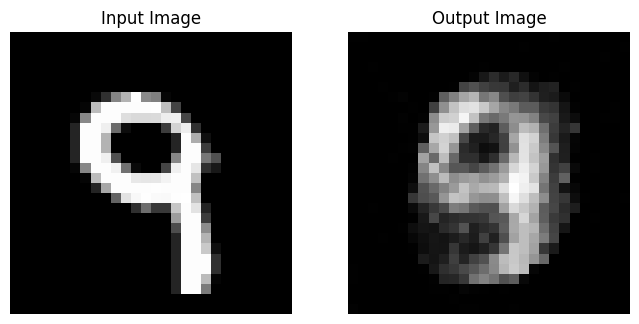

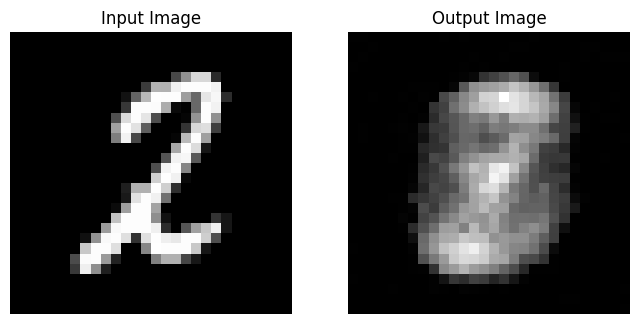

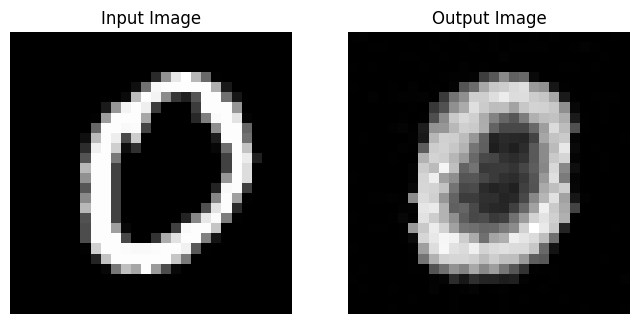

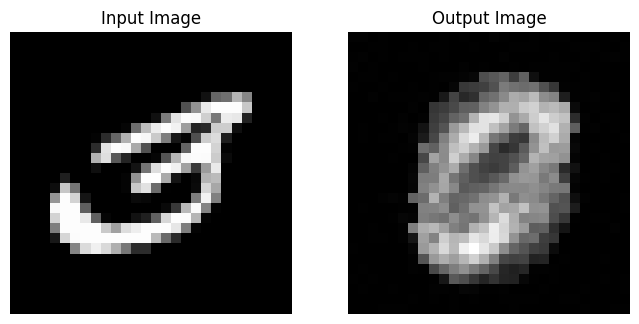

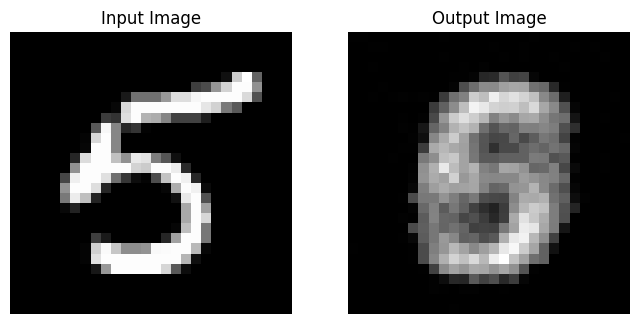

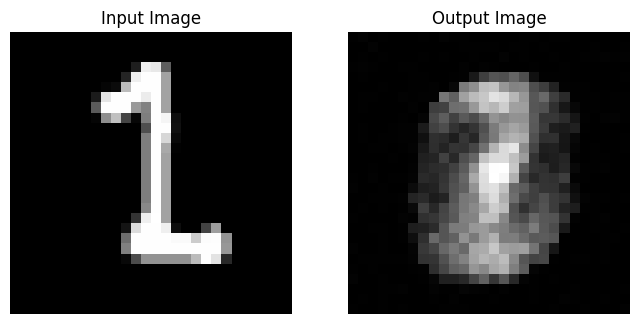

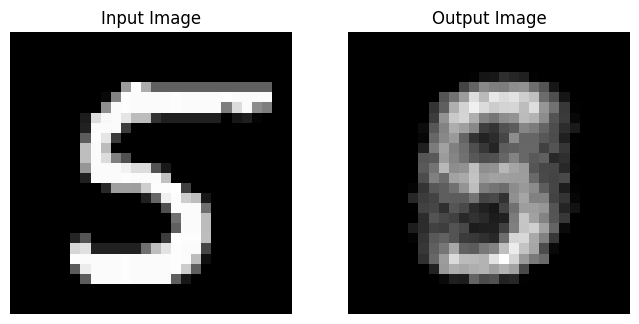

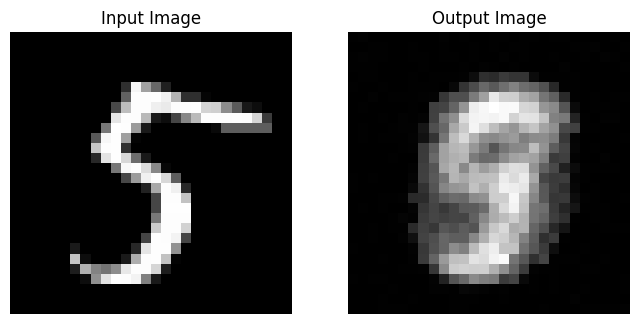

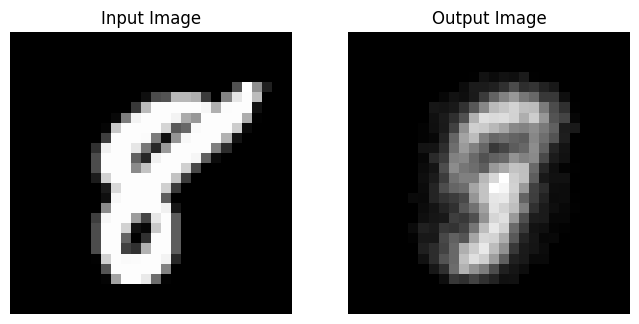

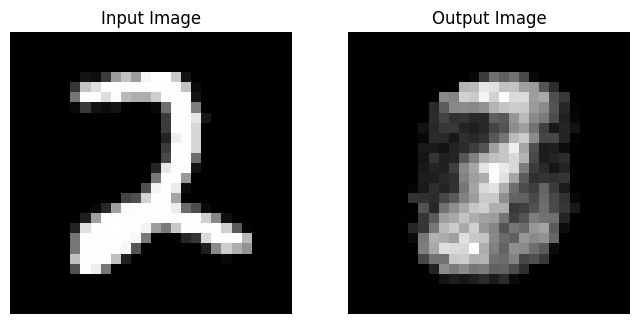

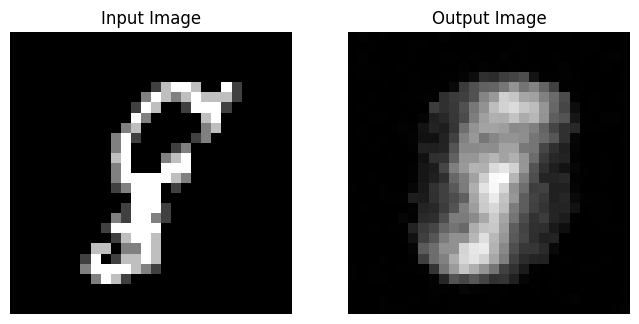

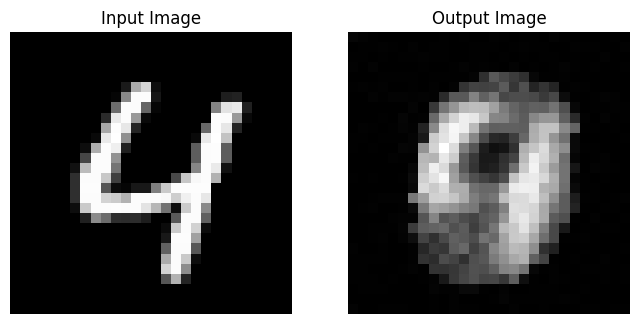

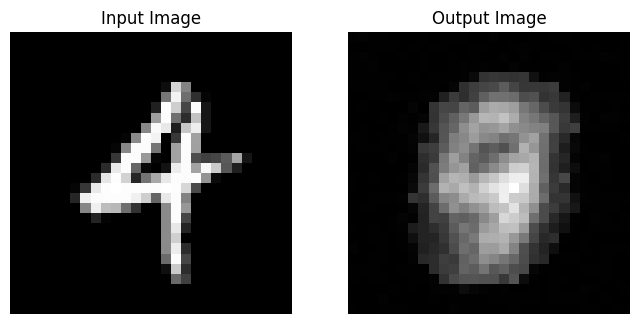

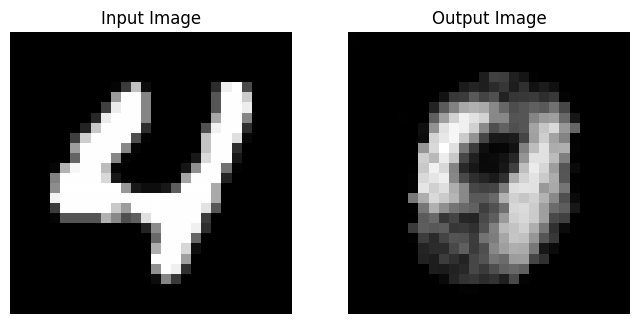

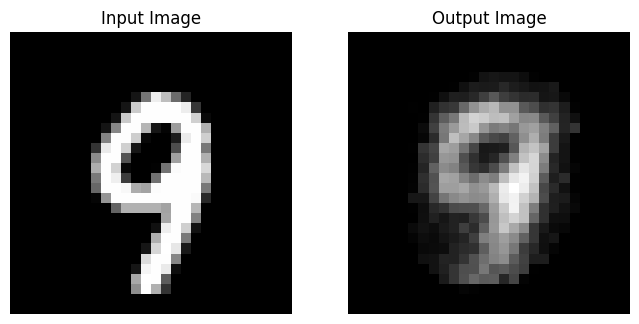

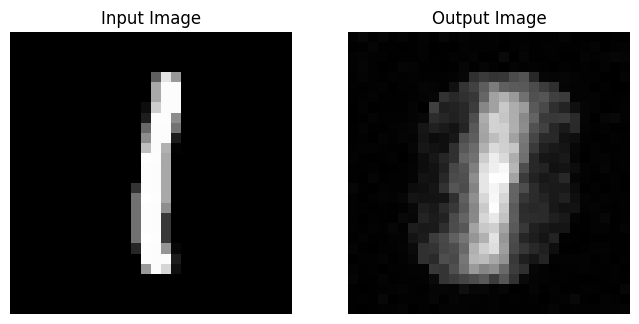

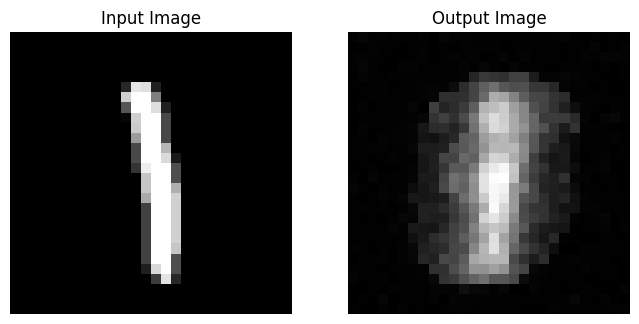

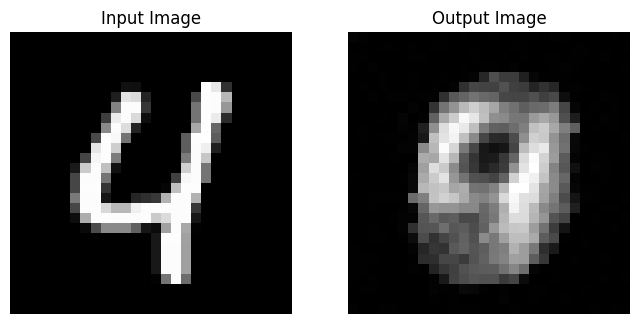

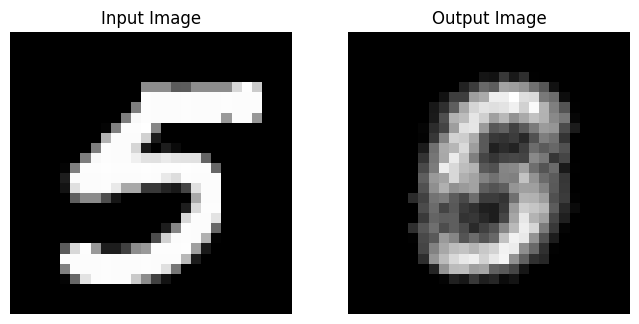

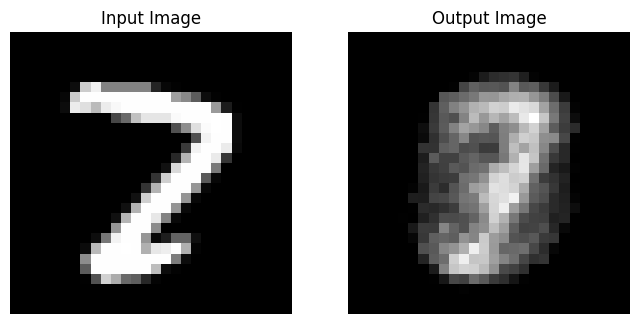

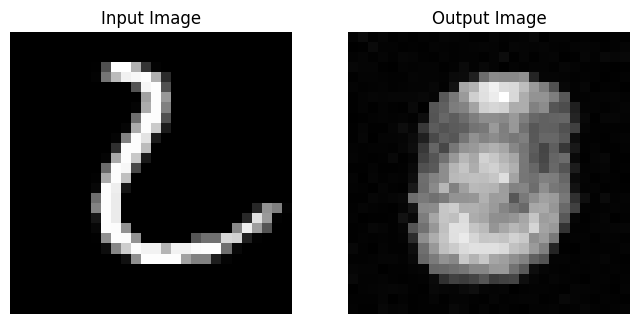

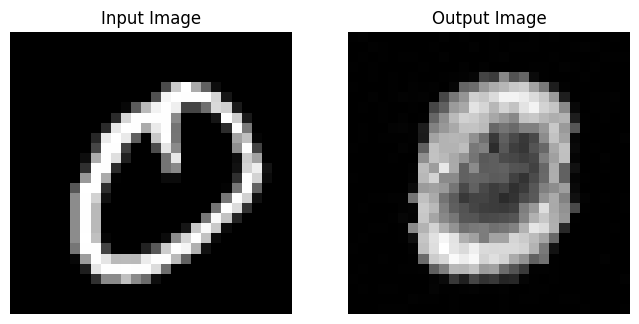

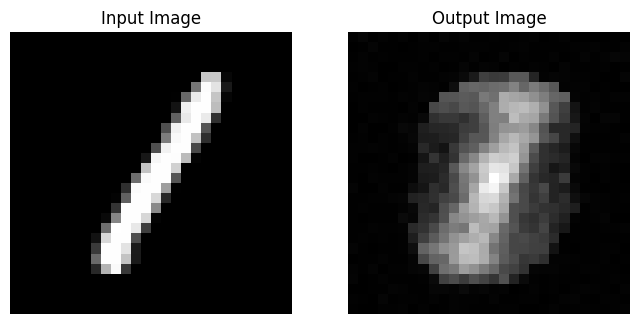

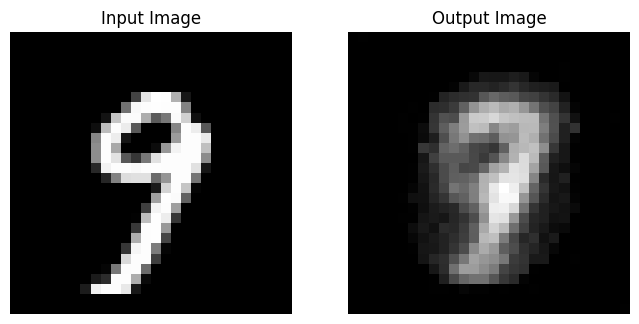

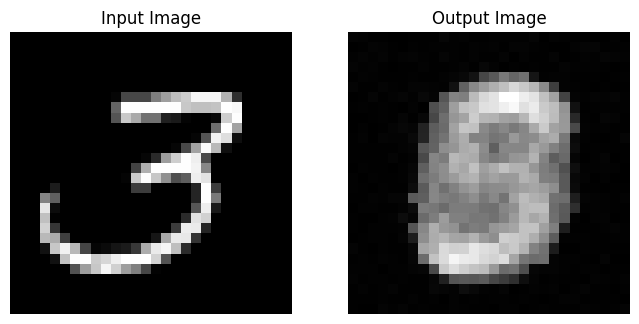

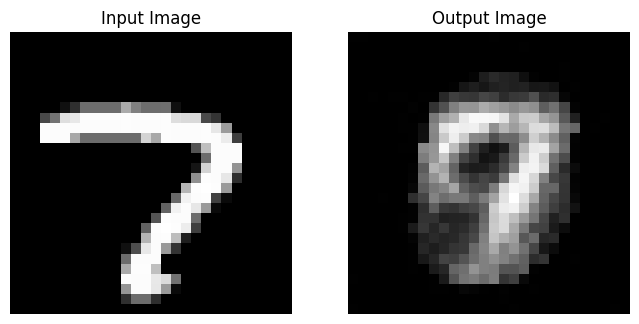

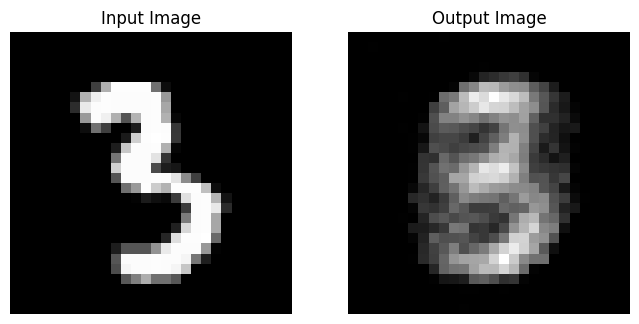

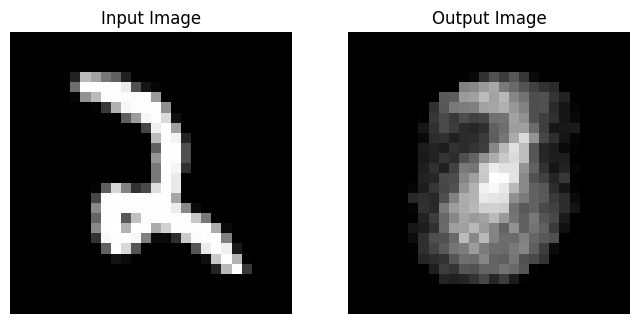

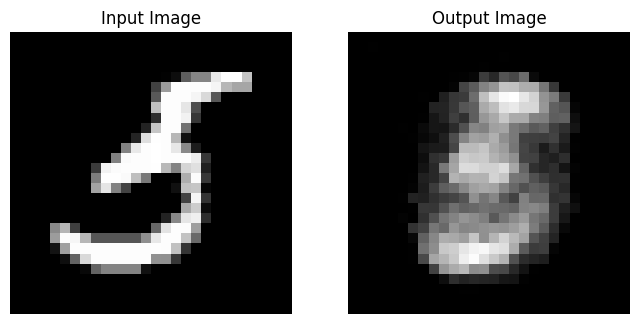

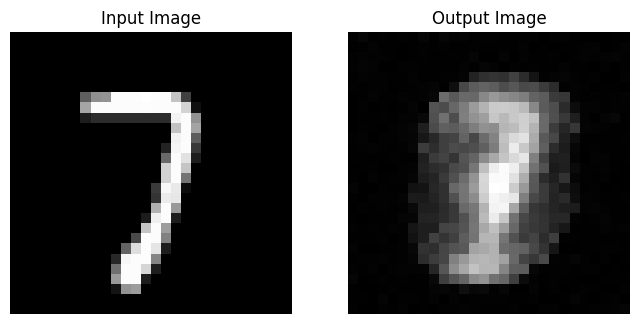

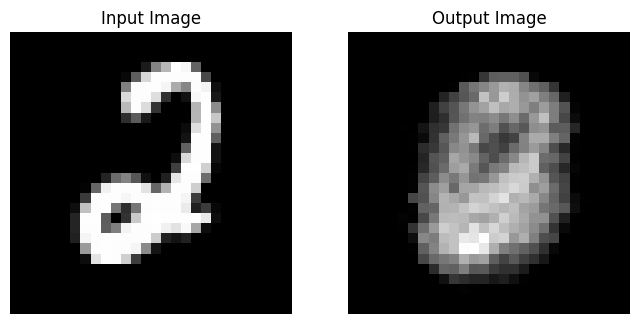

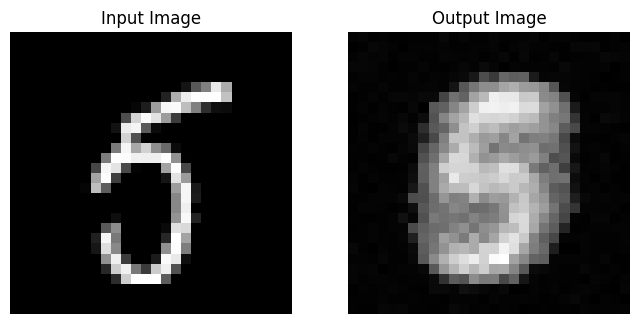

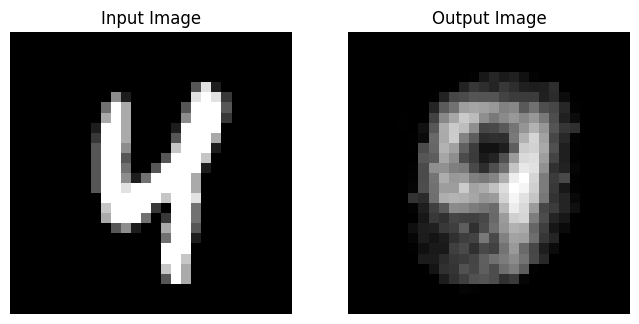

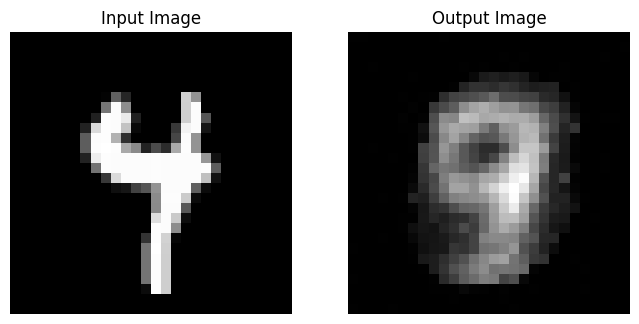

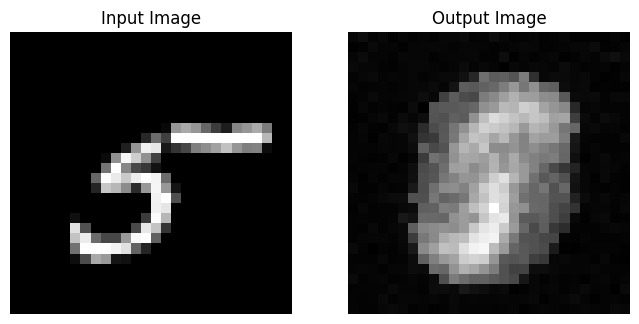

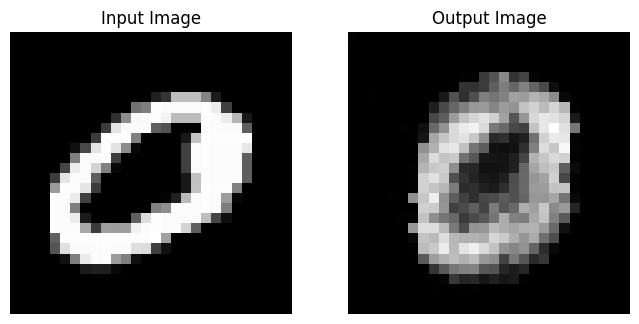

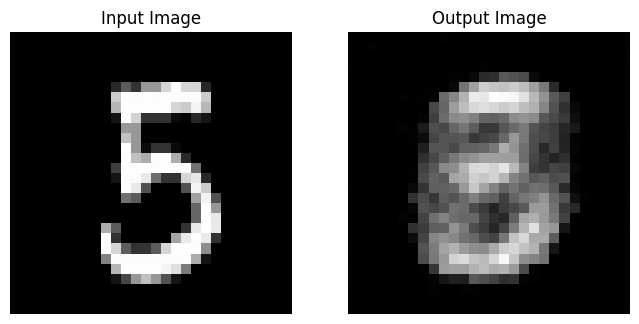

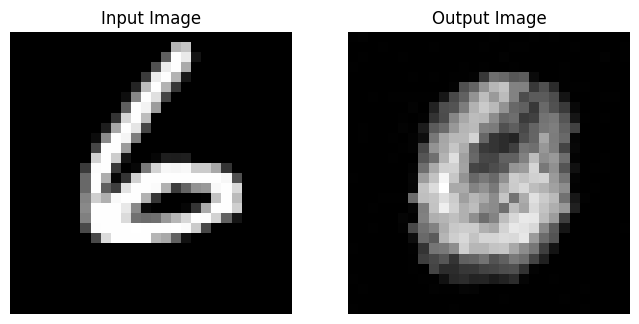

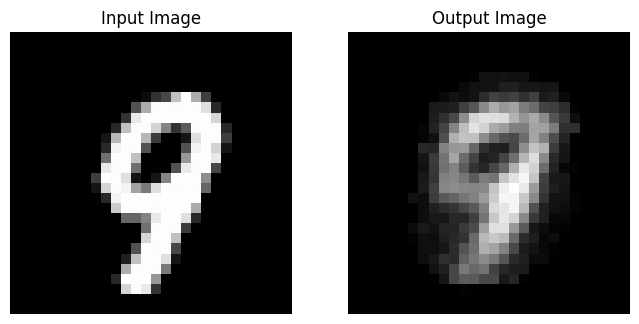

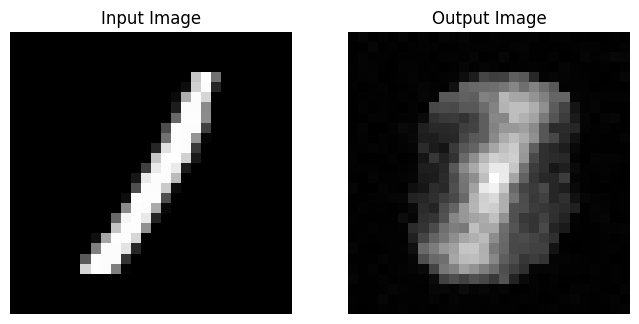

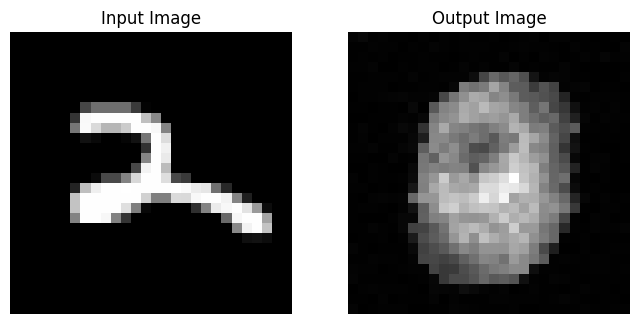

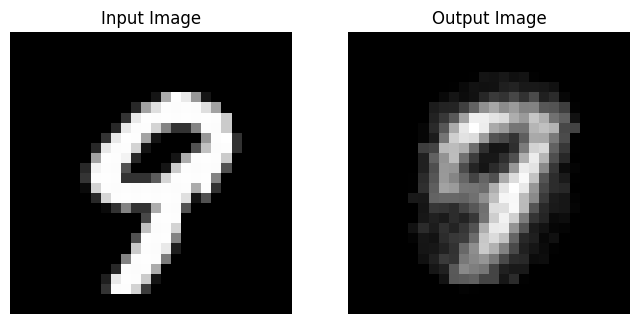

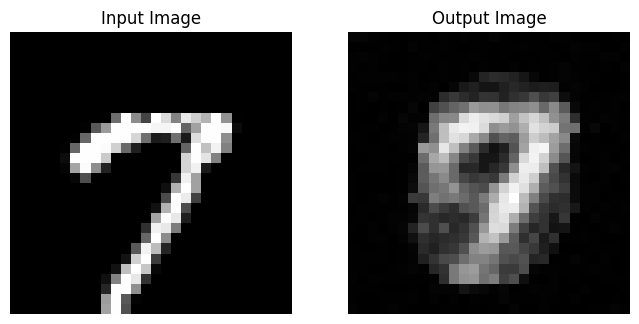

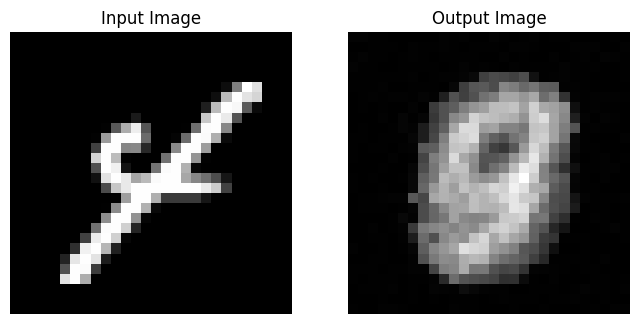

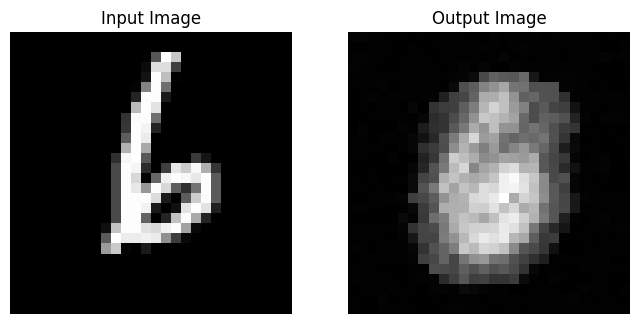

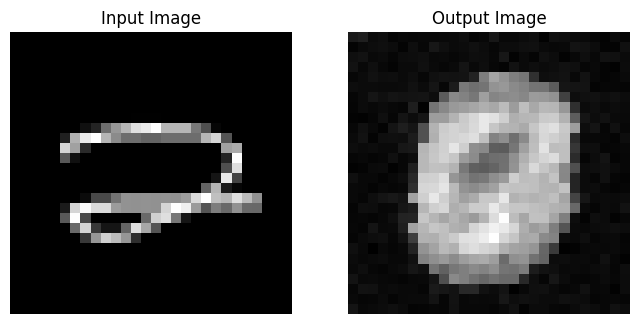

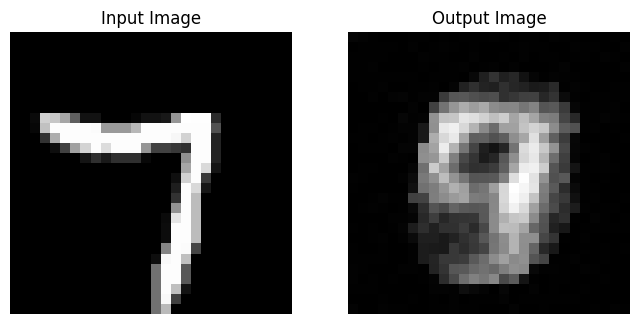

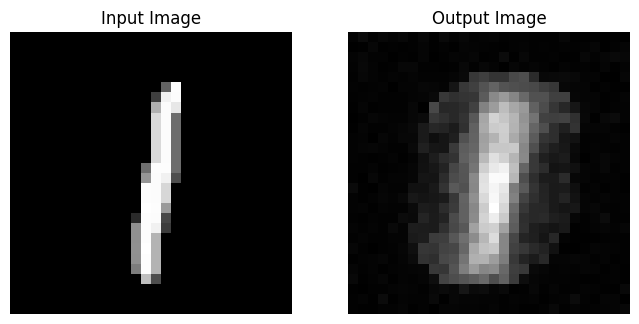

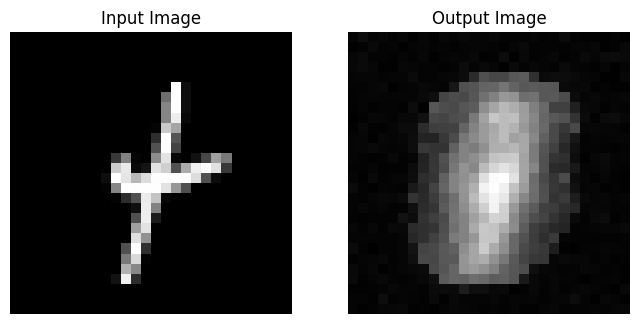

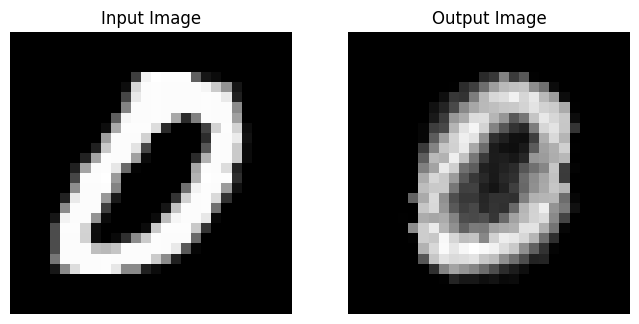

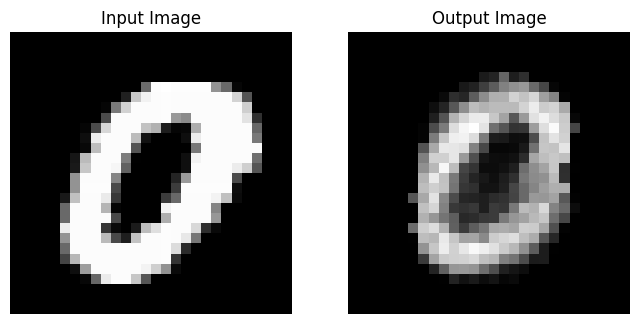

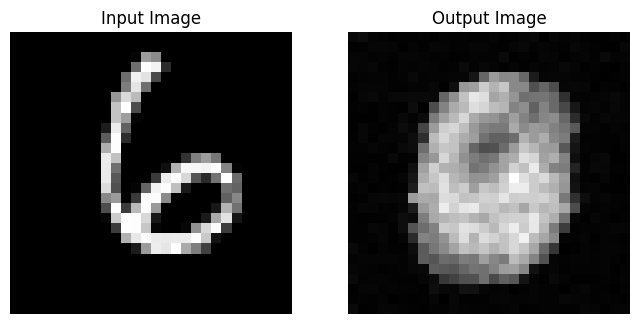

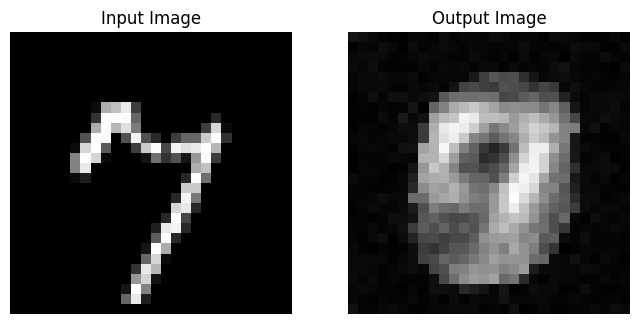

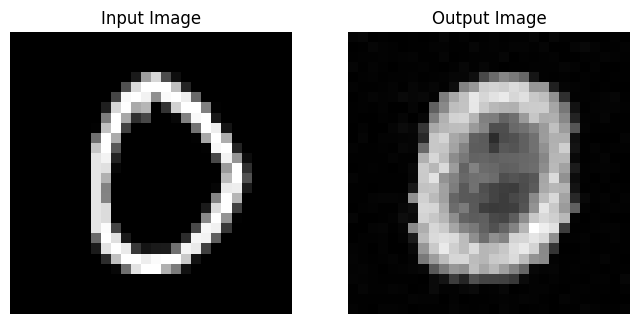

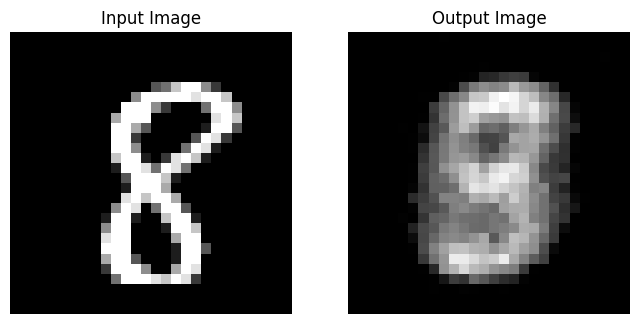

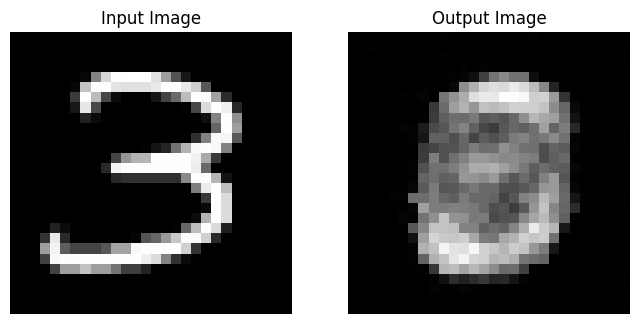

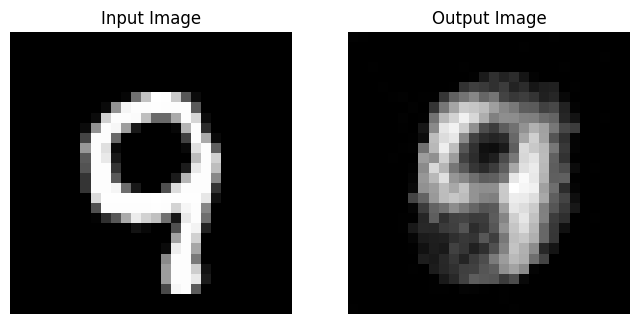

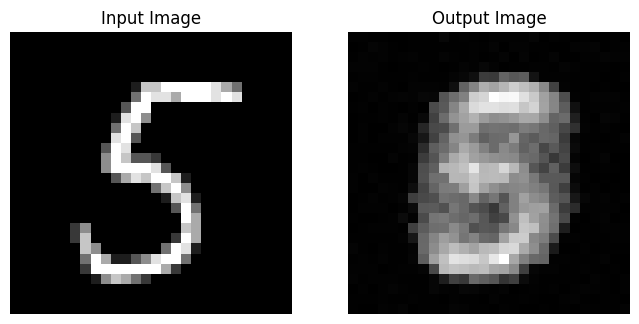

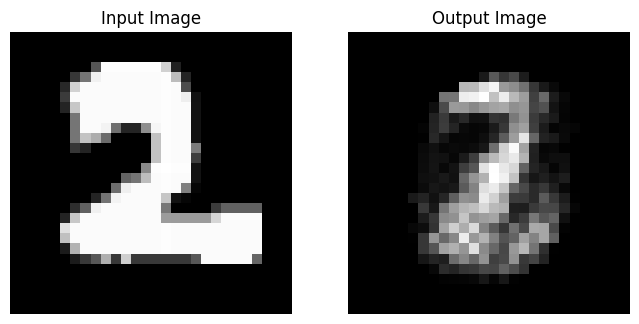

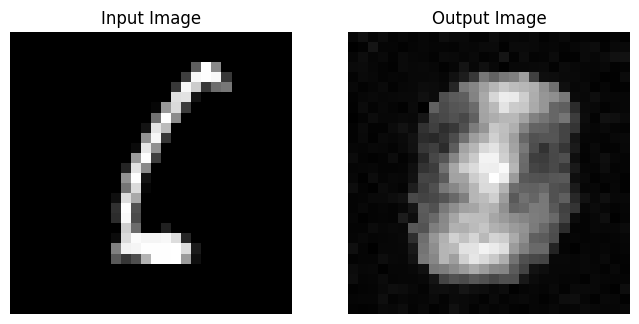

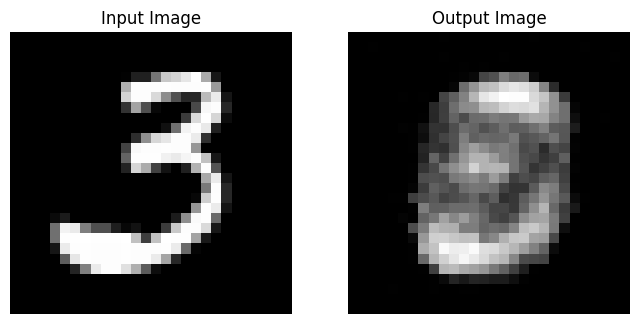

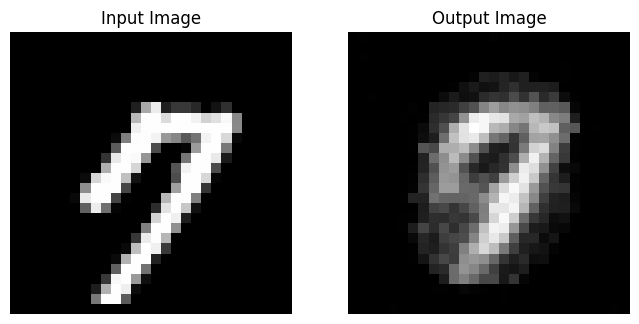

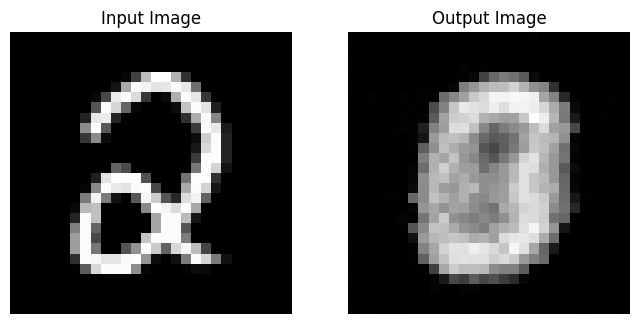

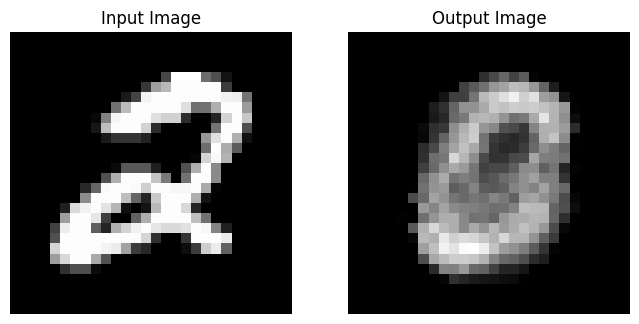

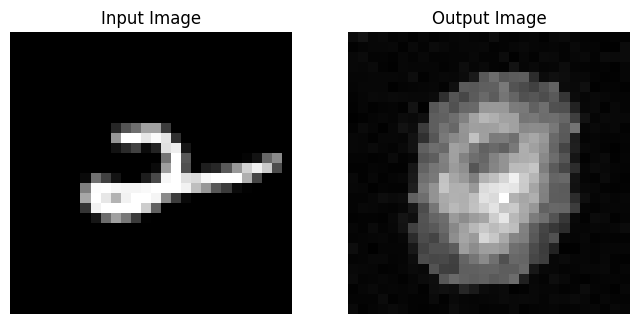

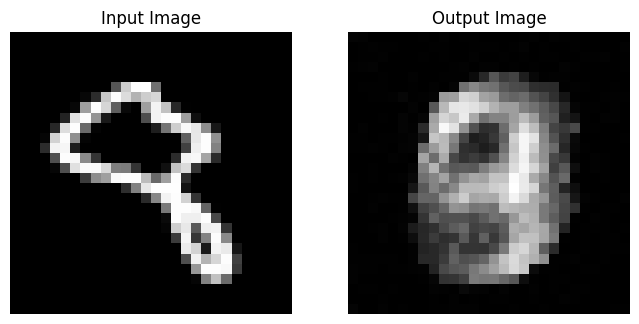

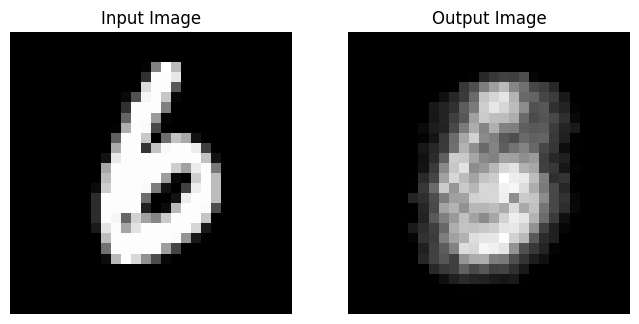

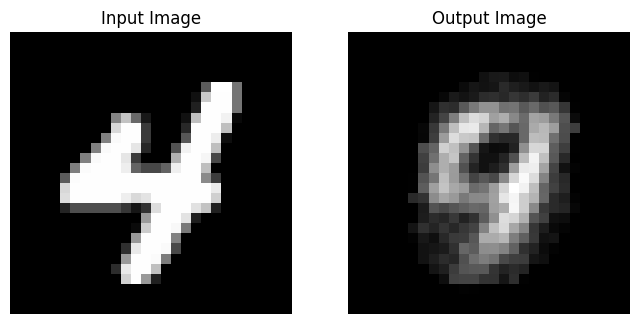

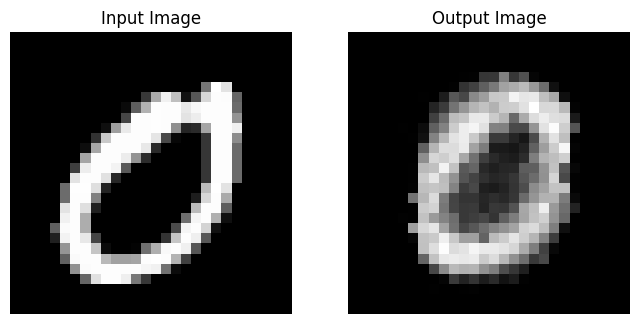

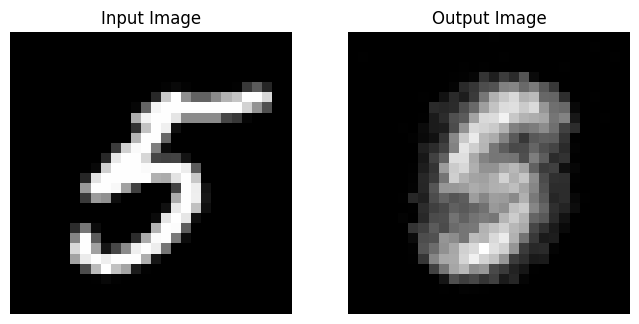

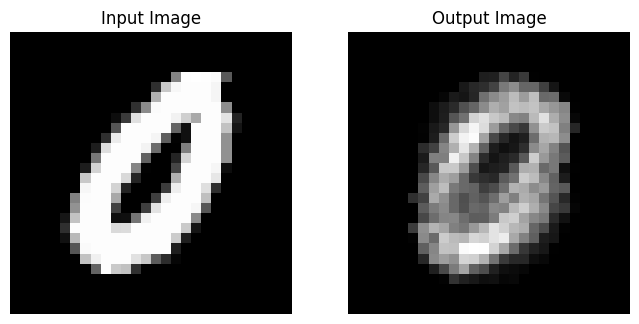

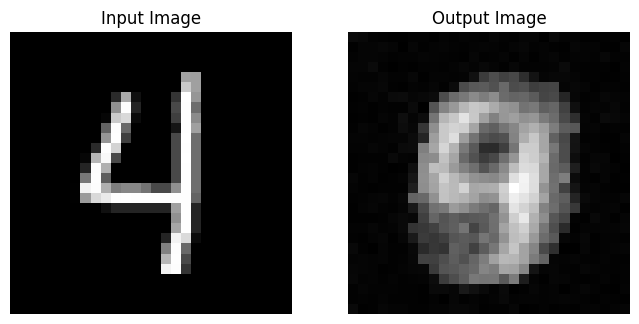

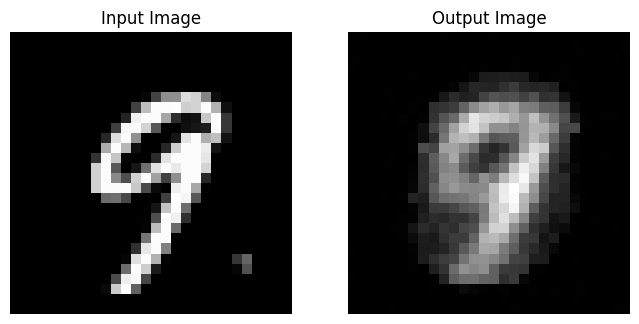

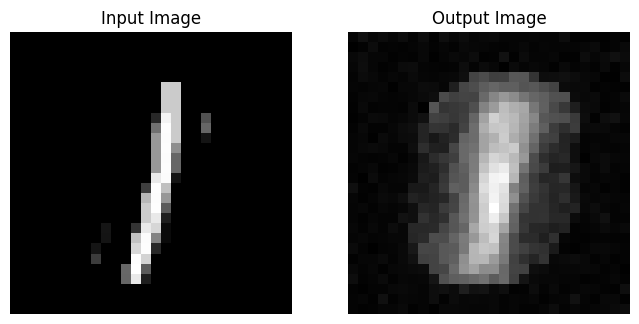

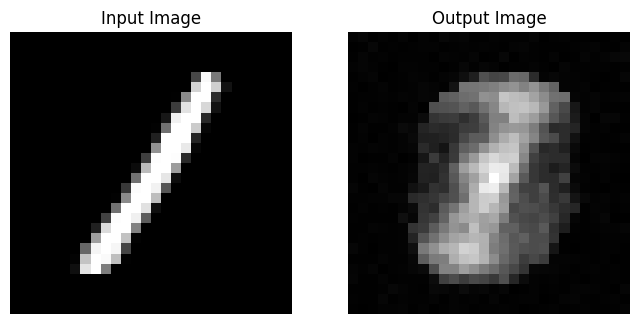

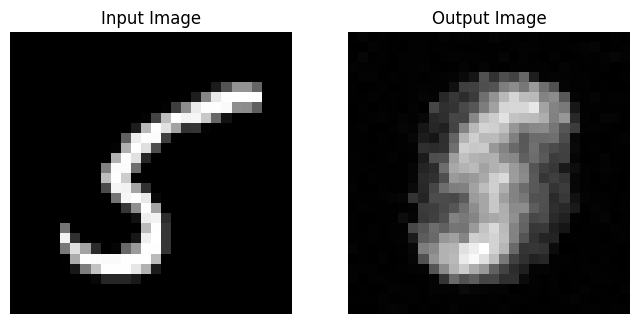

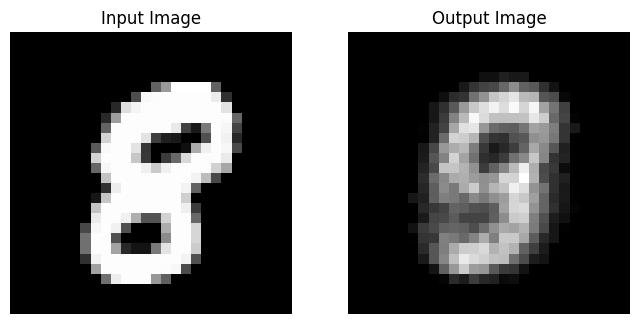

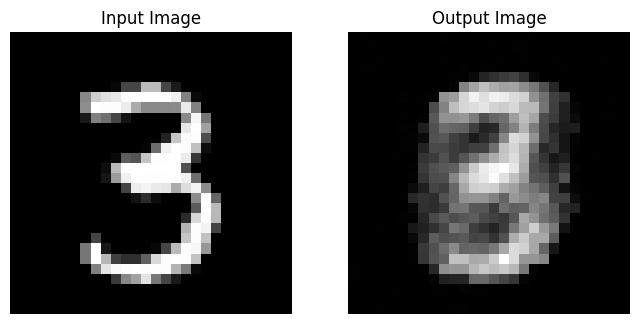

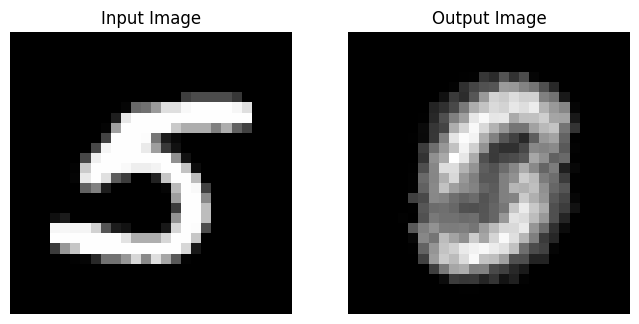

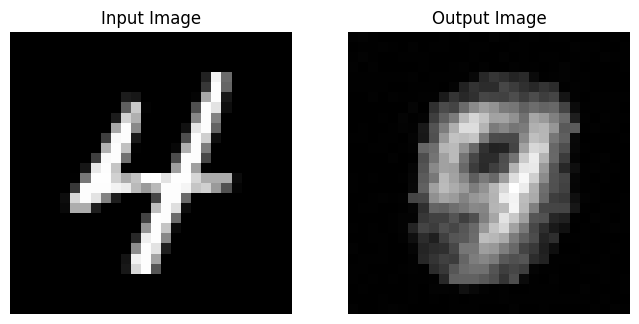

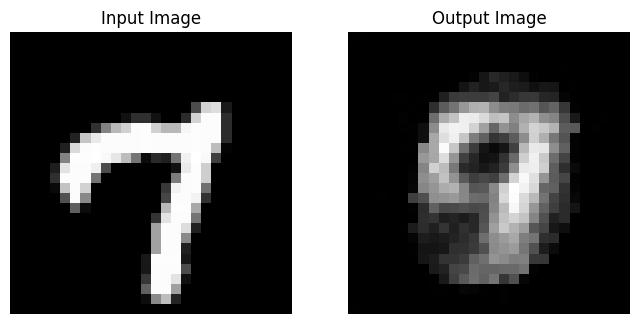

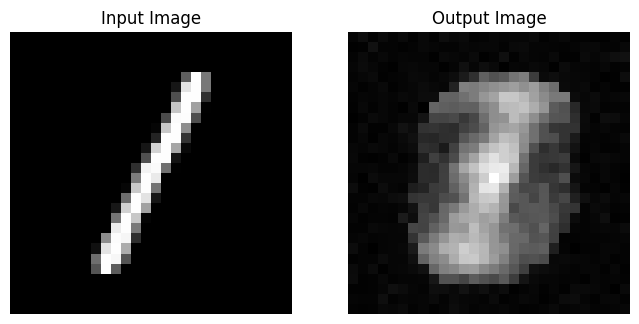

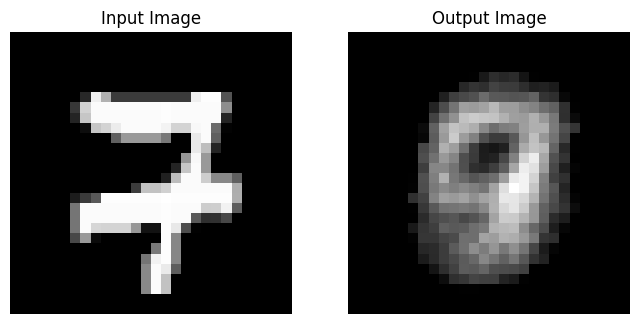

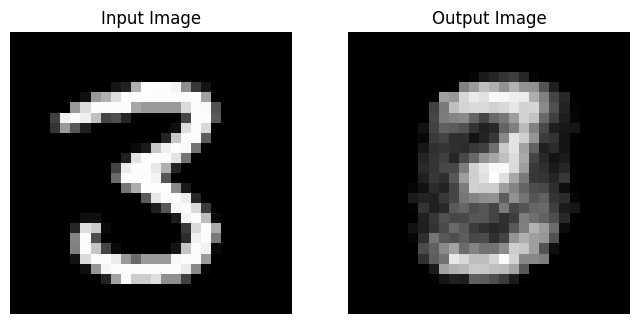

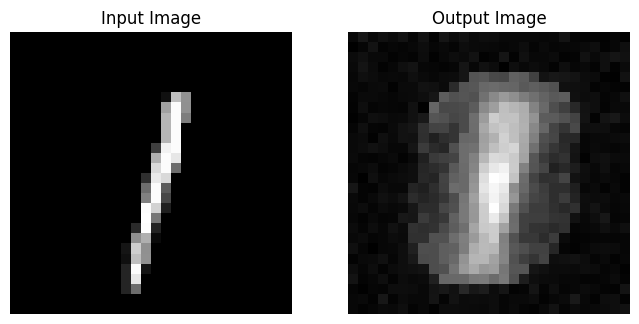

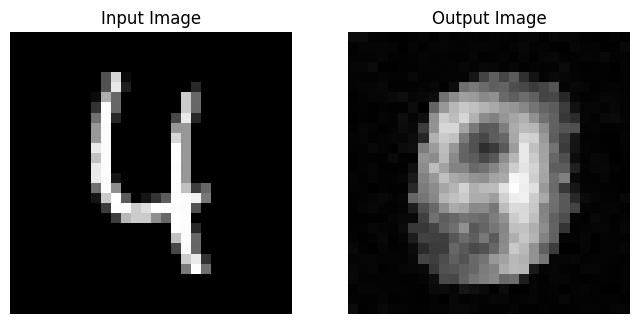

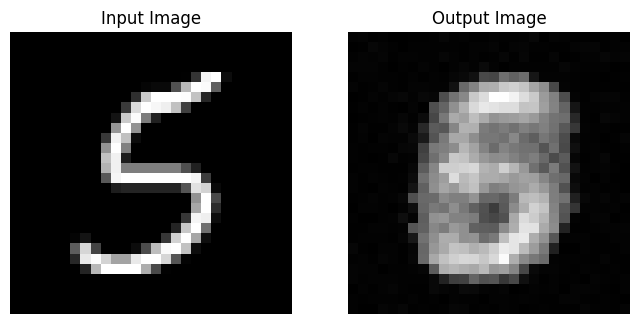

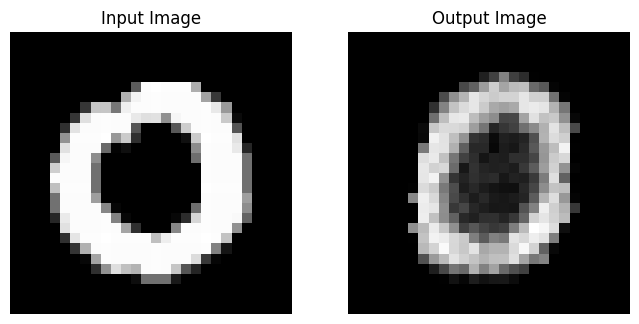

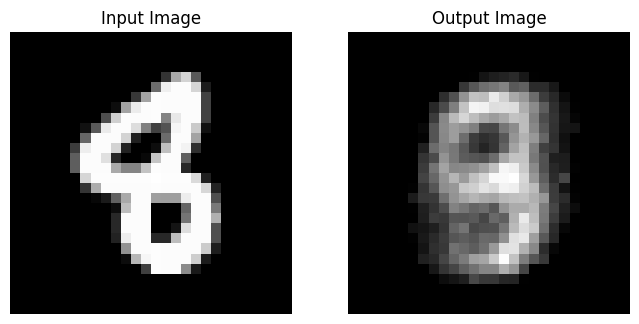

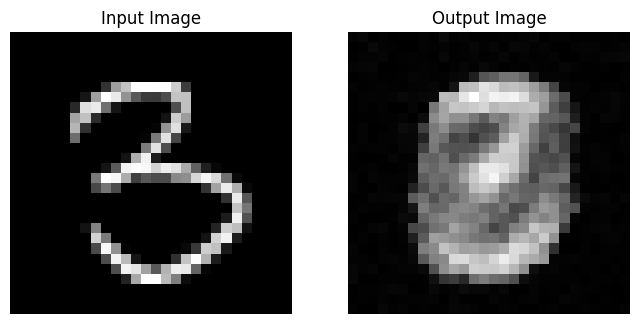

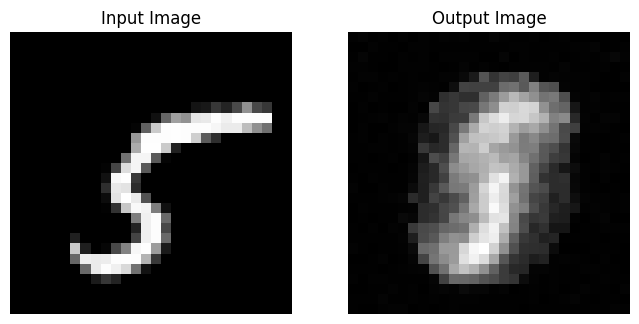

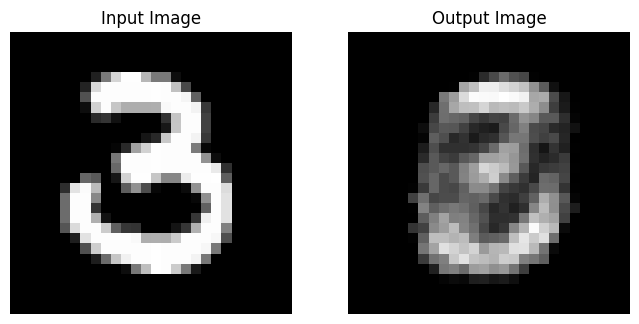

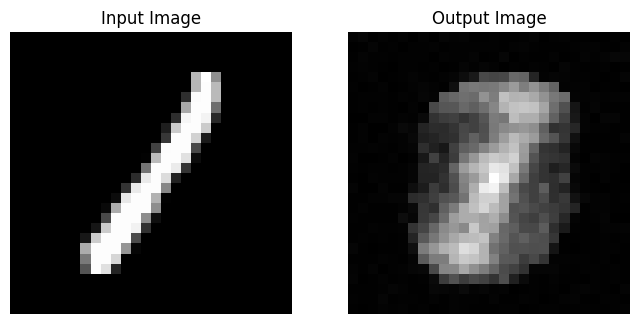

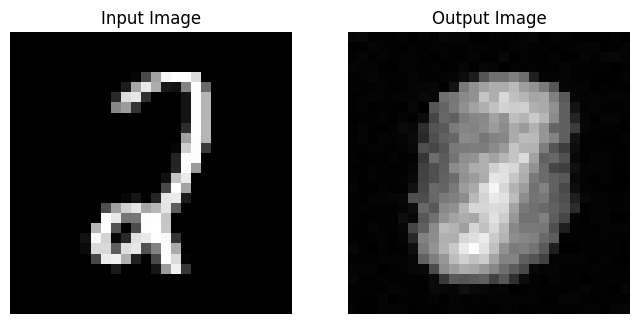

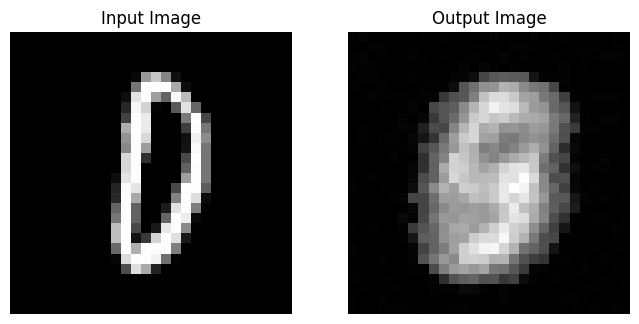

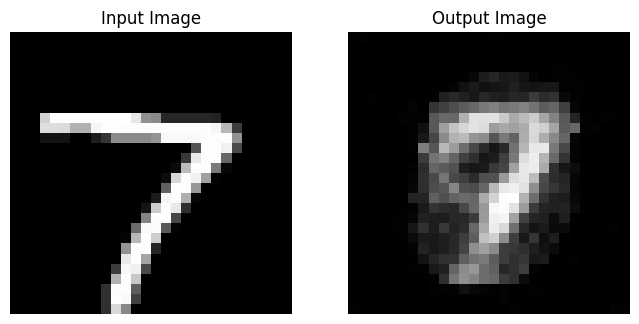

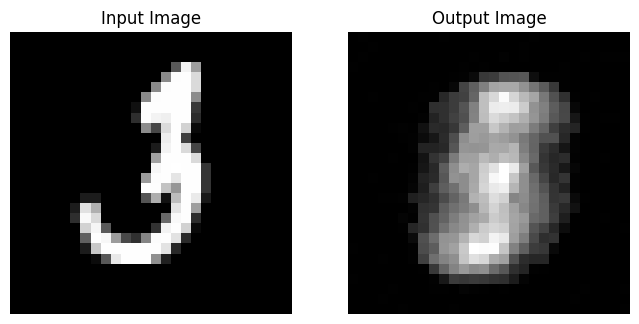

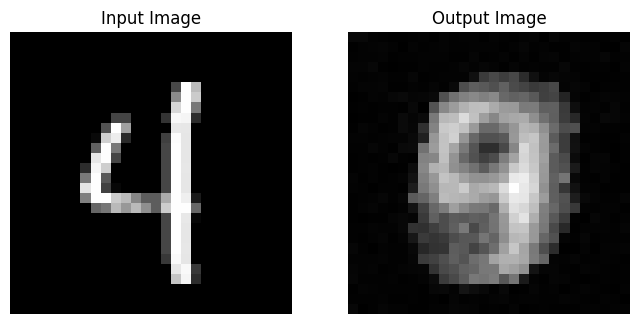

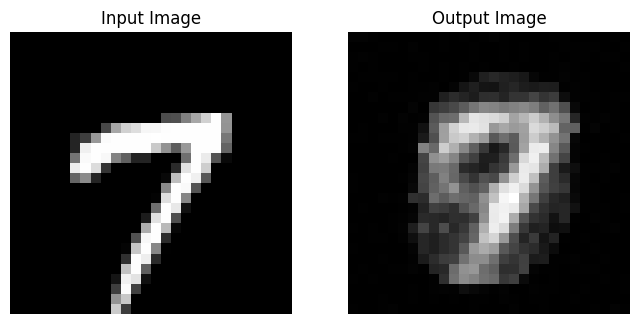

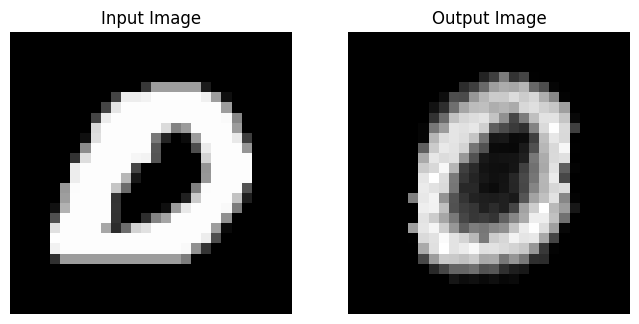

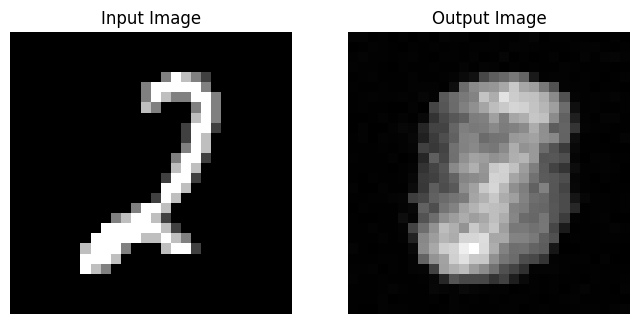

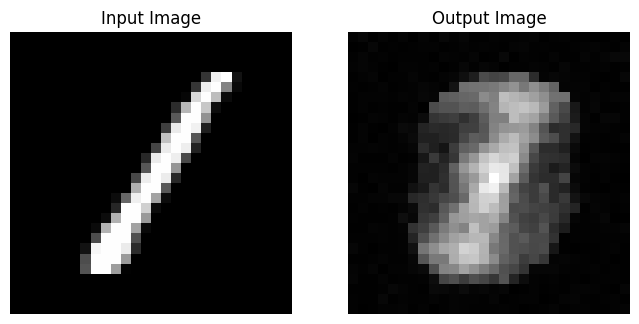

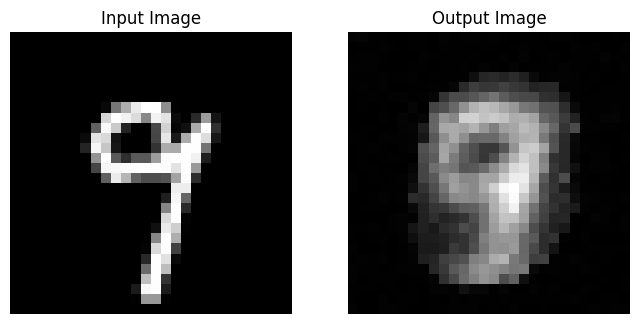

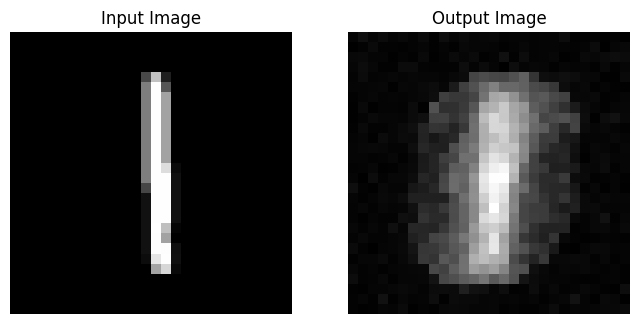

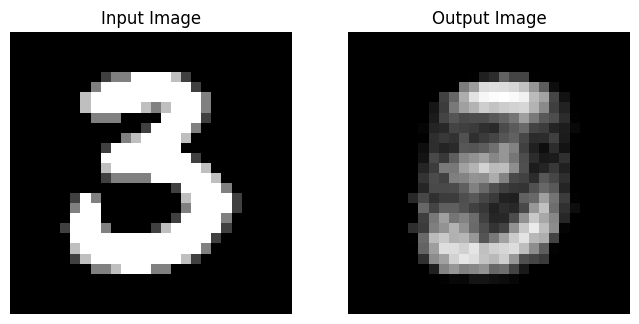

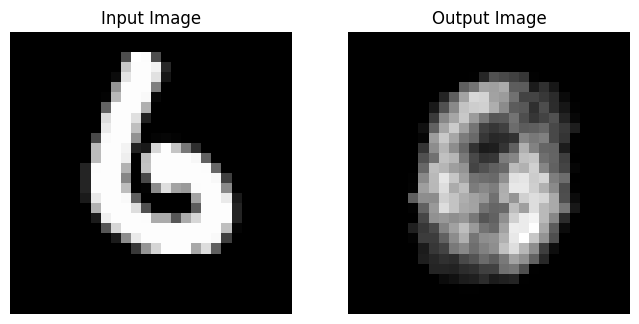

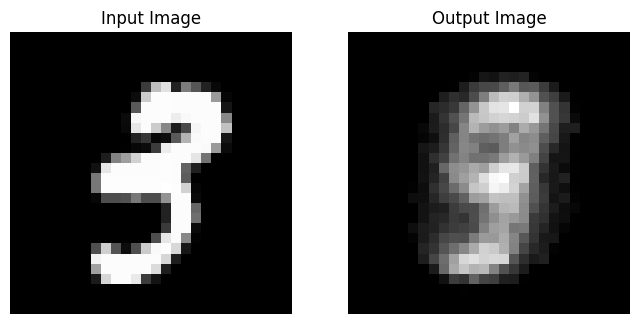

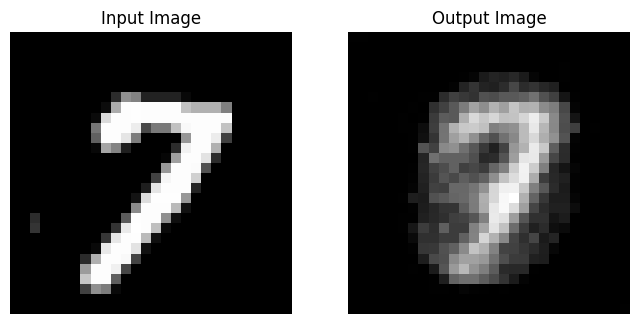

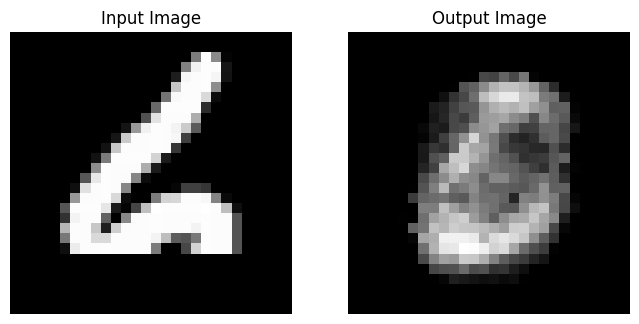

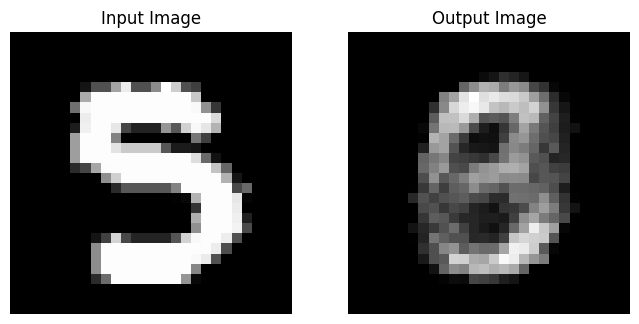

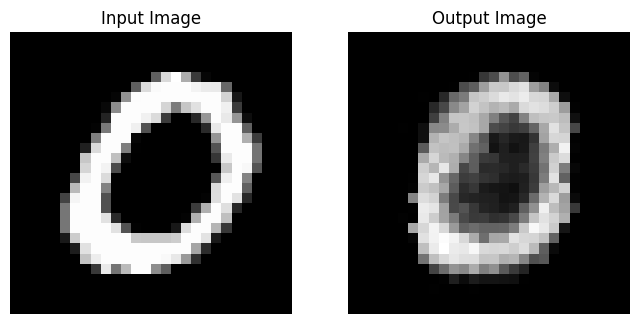

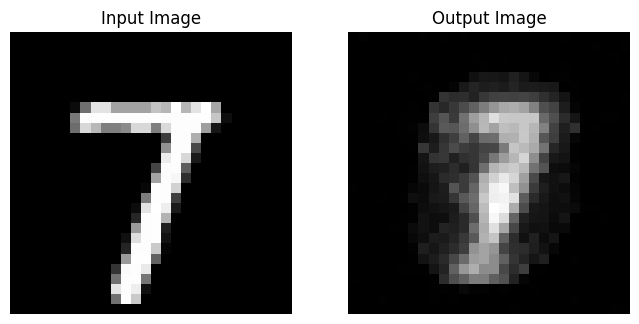

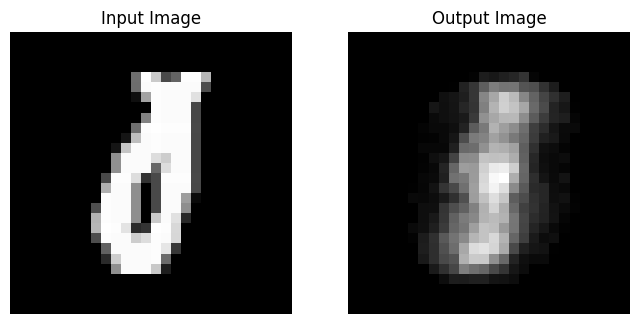

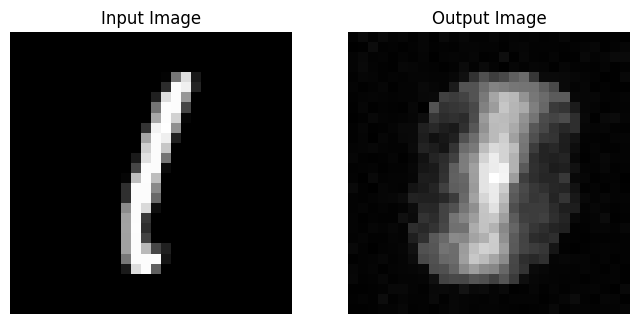

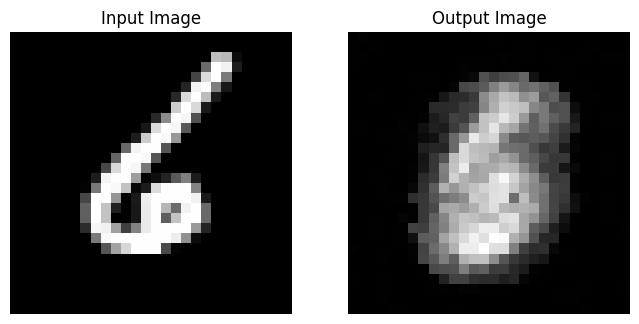

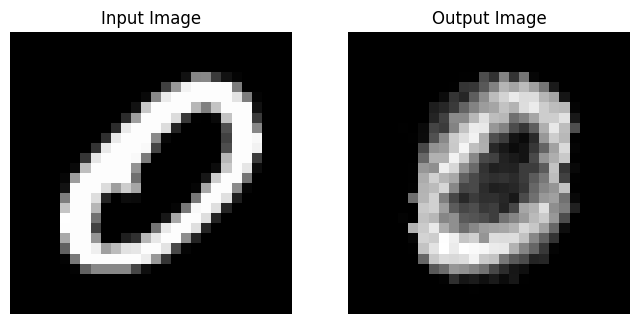

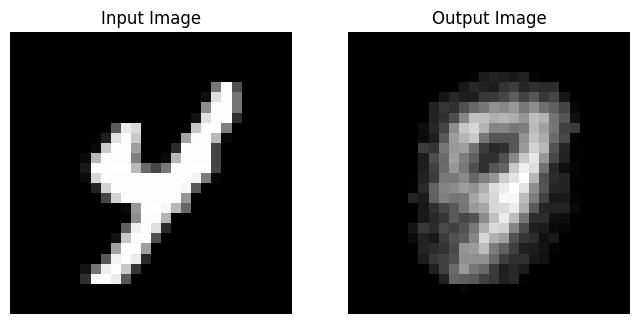

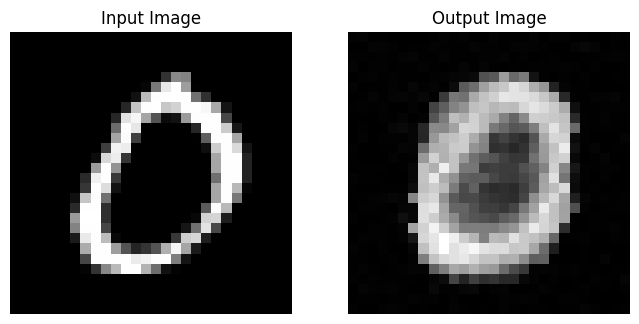

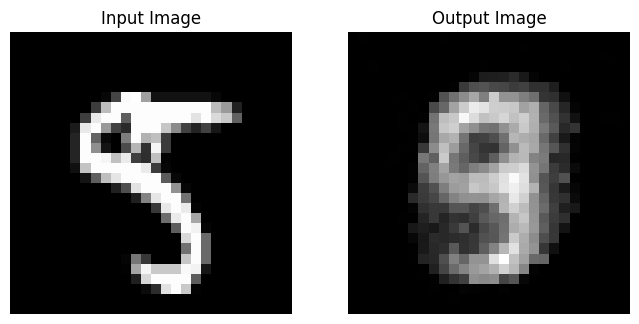

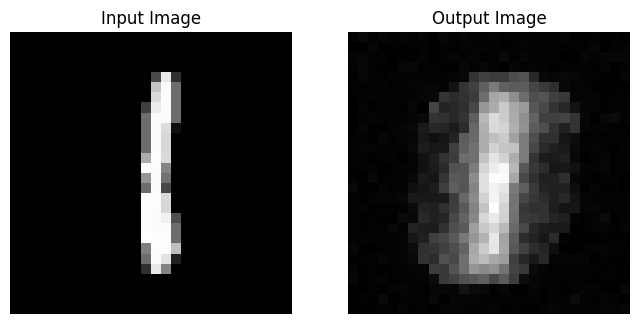

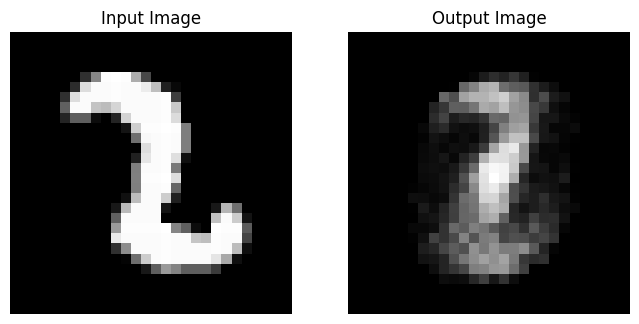

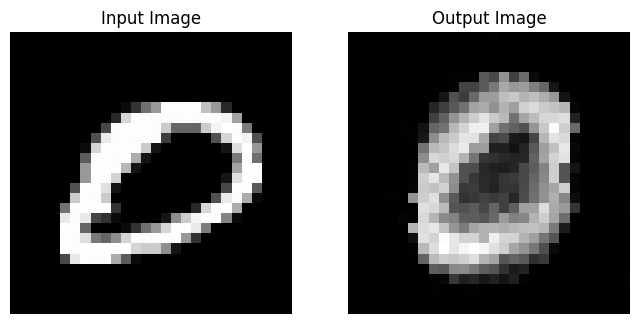

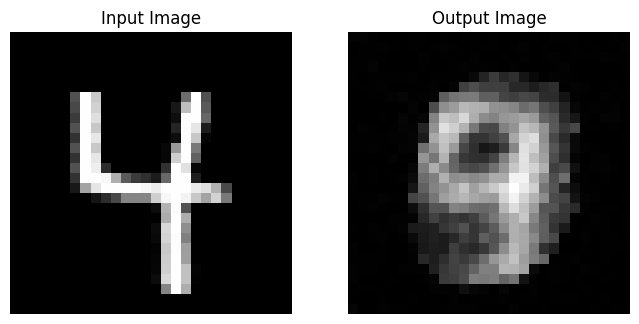

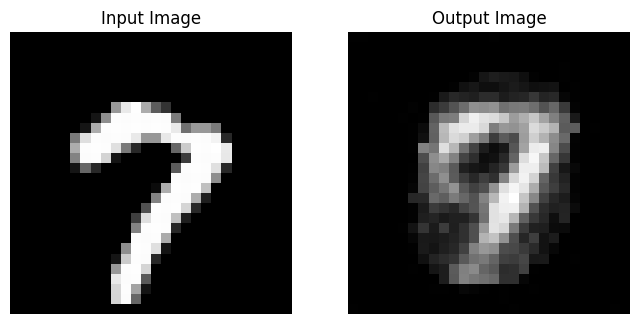

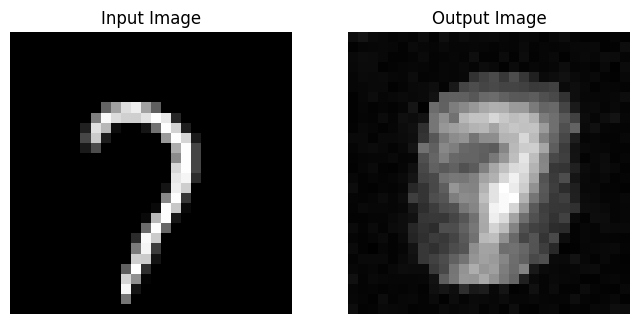

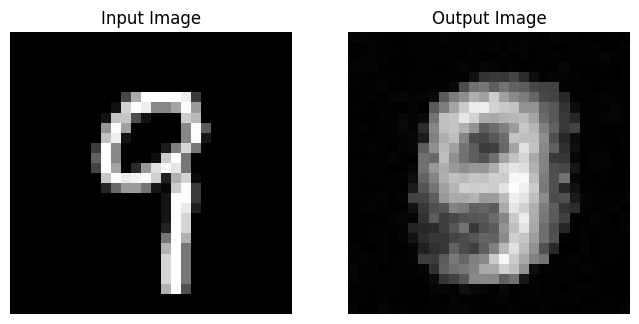

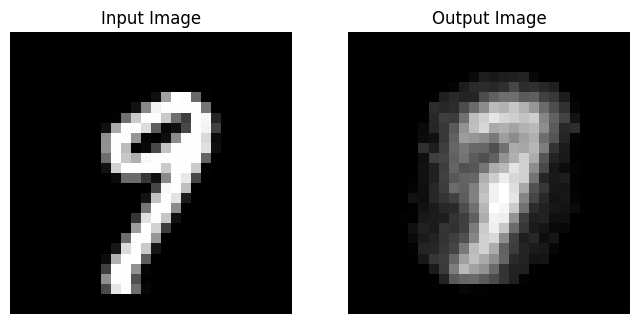

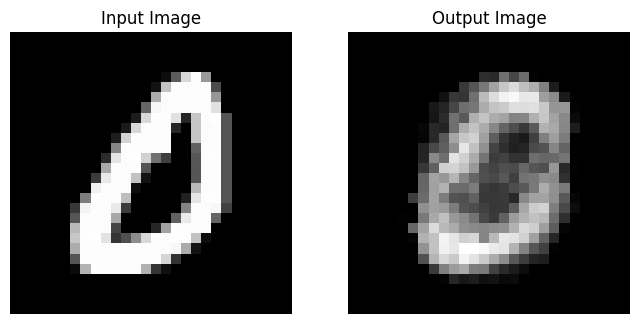

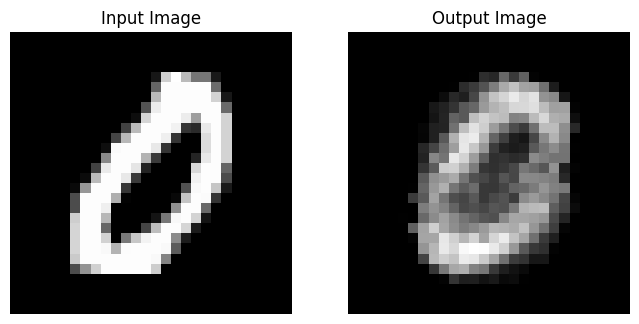

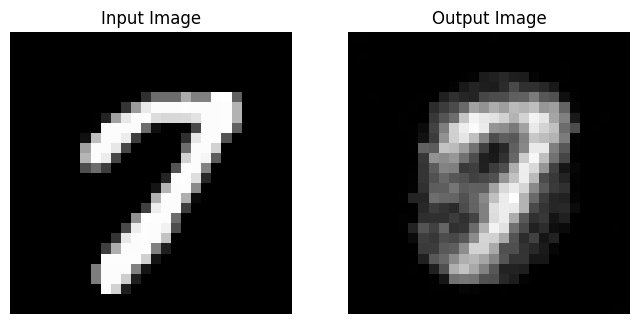

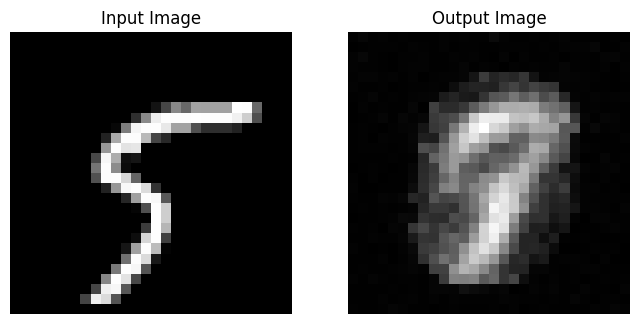

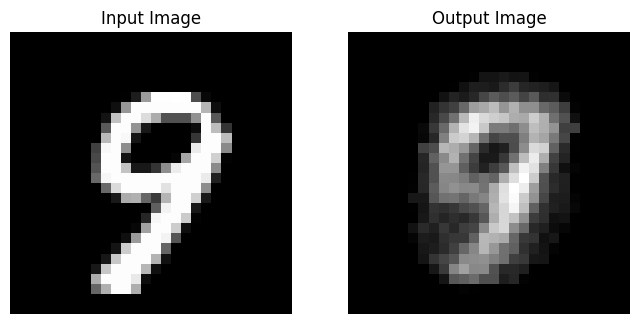

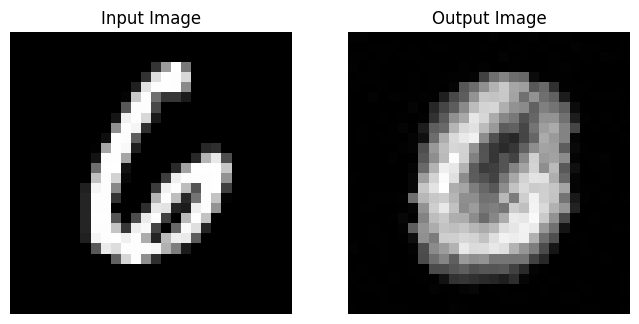

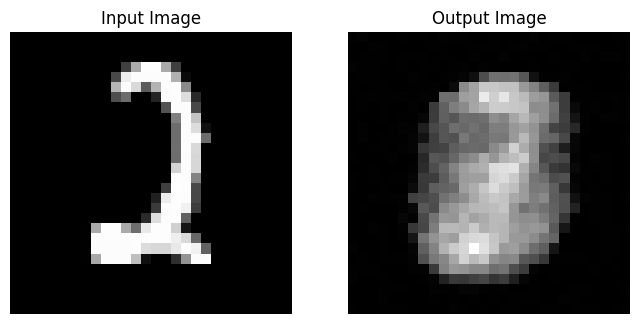

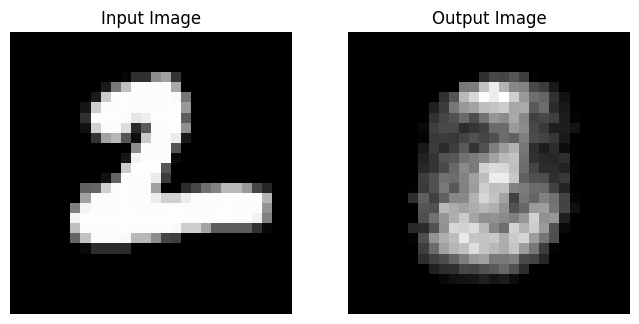

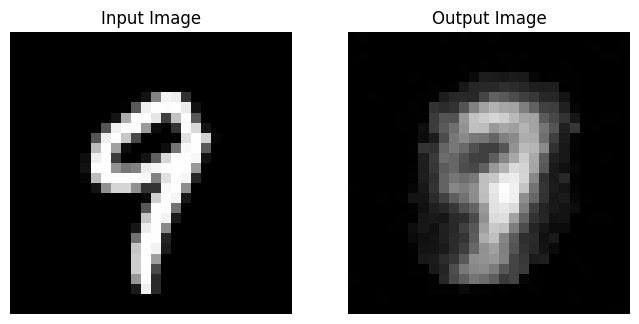

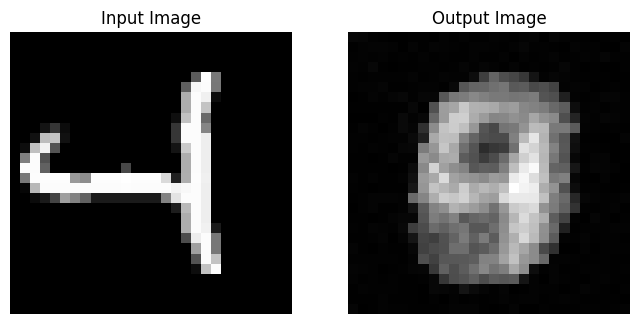

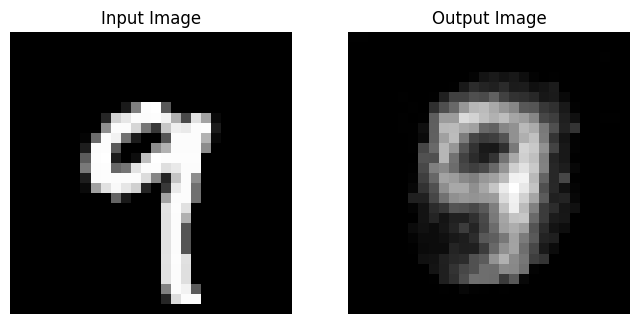

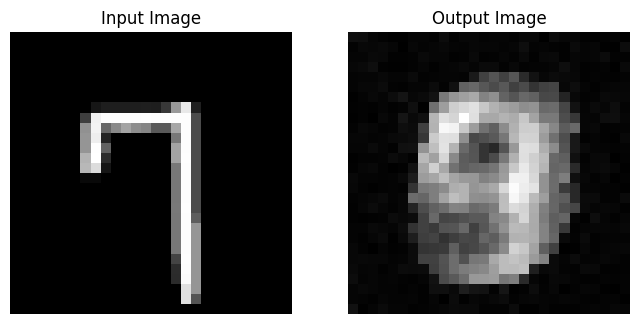

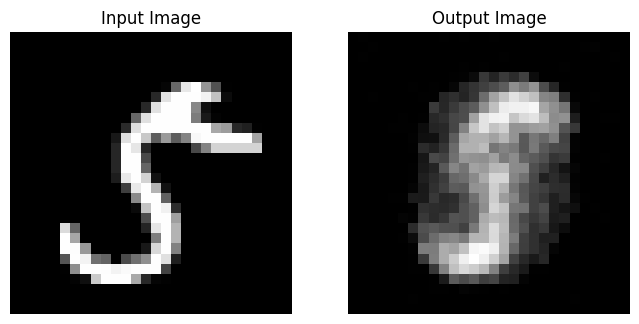

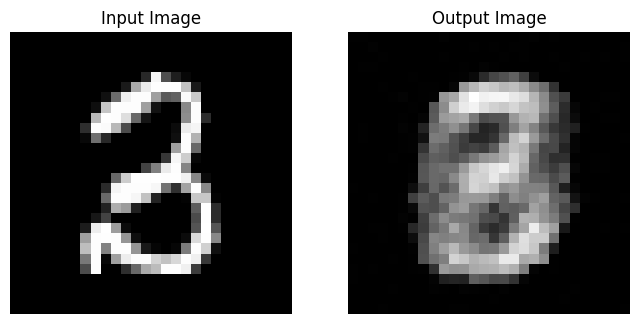

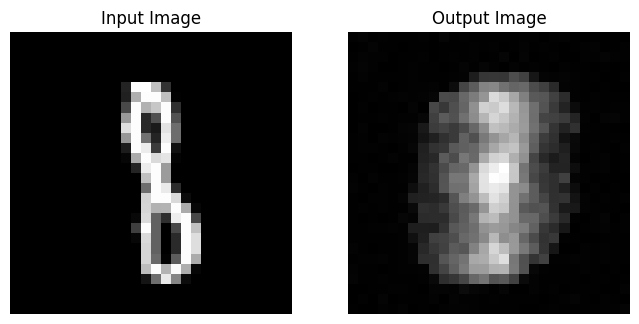

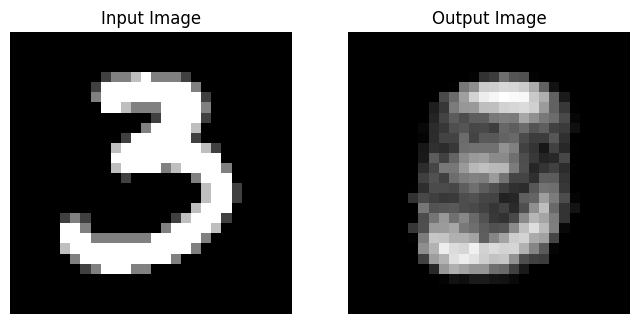

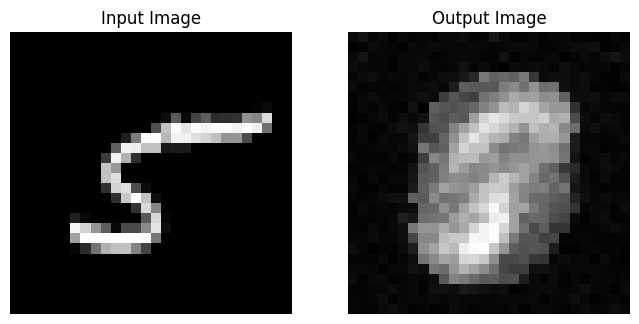

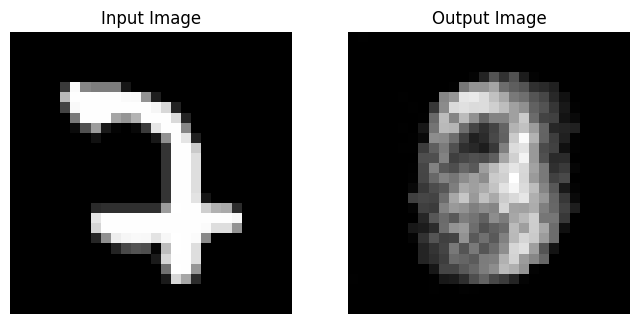

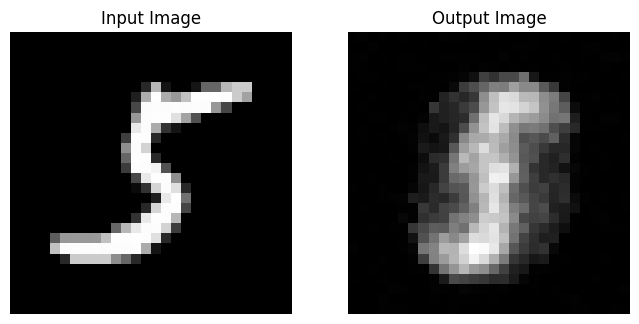

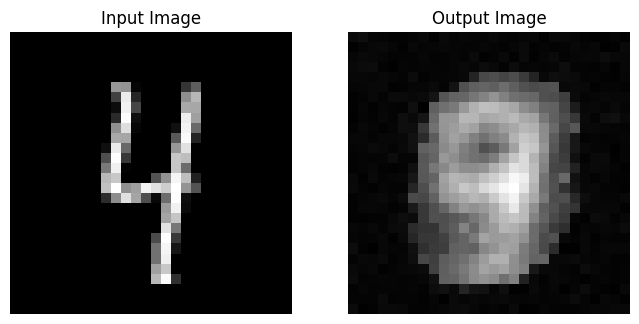

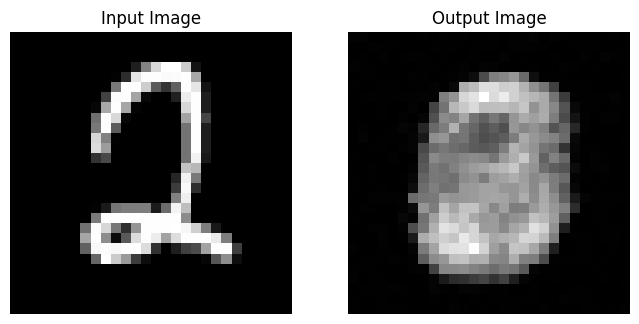

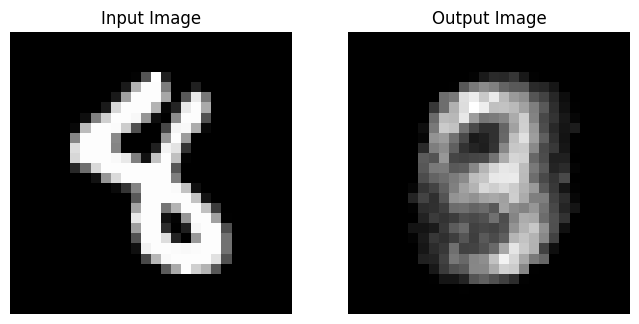

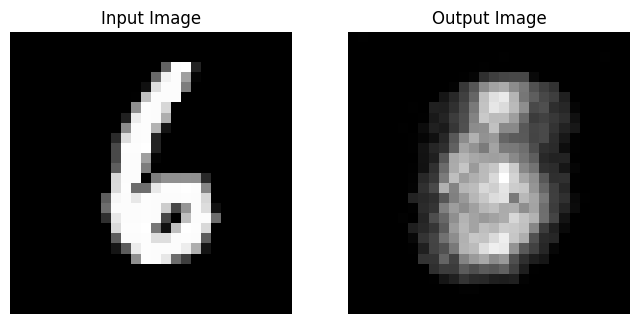

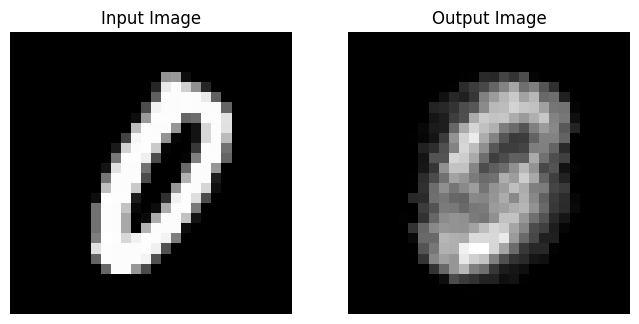

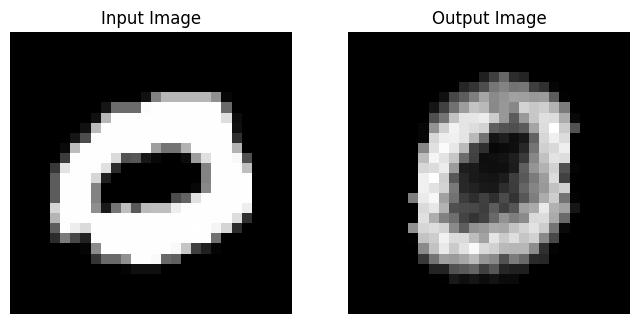

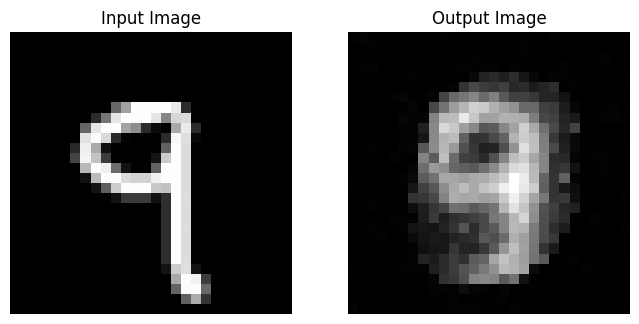

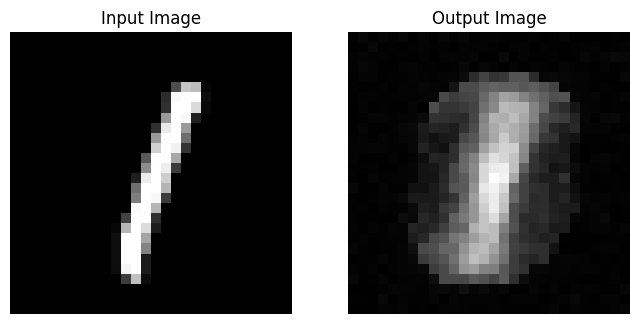

In [5]:
# Visual evaluation on the test set
with torch.no_grad():
    for data in test_dataloader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)
        
        # Forward pass through the autoencoder
        outputs = autoencoder(inputs)
        
        # Reshape the outputs to the original image shape (28x28)
        outputs = outputs.view(outputs.size(0), 1, 28, 28)
        
        # Convert Tensors to NumPy arrays for visualization
        inputs = inputs.view(inputs.size(0), 1, 28, 28).numpy()
        outputs = outputs.numpy()
        
        # Plot the input and output images
        for i in range(inputs.shape[0]):
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.title('Input Image')
            plt.imshow(np.squeeze(inputs[i]), cmap='gray')
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.title('Output Image')
            plt.imshow(np.squeeze(outputs[i]), cmap='gray')
            plt.axis('off')
            plt.show()